In [1]:
#Libraries needed - installed under Python 3.9.6. Also tested on Python 3.8
import pandas as pd
import scanpy

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-u8xz2wv7 because the default path (/home/yma781/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


## Stage 1: Reading Data from Raw Files, Filtering for Adult Barcodes, End Result: 1891 Nuclei

In [2]:
df = pd.read_csv('htseq_ORN_nuclei_LogCPM_17plates_addintron_hq50k_neuron2-5.tab.gz',  sep="\t", header=0, index_col=0)

In [3]:
#these two below don't use anymore
df_ORN_24h = pd.read_csv('htseq_ORN_cell_LogCPM_10plates_hq50k_neuron2-5.tab.gz', sep="\t", header=0, index_col=0)

df_ORN_42h = pd.read_csv('htseq_logCPM_hq.tab.gz', sep="\t", header=0, index_col=0)

In [4]:
names_adult = []
with open ("names_ORN_hq_24h_adult_lamGFP_noAN.txt") as f:
    for line in f:
        names_adult.append(line.rstrip())

In [5]:
names_adult

['',
 'ORNnuclei_adult_nSybUNC84GFP_P6_F5',
 'ORNcell_24h_ElavCD8GFP_P4_A210',
 'ORNnuclei_adult_nSybUNC84GFP_P5_A11',
 'ORNnuclei_adult_nSybUNC84GFP_P8_M19',
 'ORNcell_24h_ElavCD8GFP_P4_A208',
 'ORN_10day_nuclei_P3_N18',
 'ORNnuclei_adult_nSybUNC84GFP_P9_L14',
 'ORNcell_24h_ElavCD8GFP_P4_A100',
 'ORNcell_24h_ElavCD8GFP_P6_A181',
 'ORNcell_24h_ElavCD8GFP_P4_A87',
 'ORNcell_24h_ElavCD8GFP_P7_A257',
 'ORNnuclei_adult_nSybUNC84GFP_P2_C15',
 'ORNcell_24h_ElavCD8GFP_P7_A197',
 'ORNcell_24h_ElavCD8GFP_P3_E8',
 'ORNnuclei_adult_nSybUNC84GFP_P7_N20',
 'ORNcell_24h_ElavCD8GFP_P1_M2',
 'ORNnuclei_adult_nSybUNC84GFP_P10_E7',
 'ORNcell_24h_ElavCD8GFP_P6_A32',
 'ORNnuclei_adult_nSybUNC84GFP_P7_B1',
 'ORN_10day_nuclei_P3_E13',
 'ORNnuclei_adult_nSybUNC84GFP_P5_B24',
 'ORNnuclei_adult_nSybUNC84GFP_P7_K16',
 'ORNcell_24h_ElavCD8GFP_P5_A371',
 'ORNcell_24h_ElavCD8GFP_P3_L2',
 'ORNnuclei_adult_nSybUNC84GFP_P8_E23',
 'ORNnuclei_adult_nSybUNC84GFP_P8_F11',
 'ORNnuclei_adult_nSybUNC84GFP_P9_K4',
 'ORNcell_

In [6]:
df_reset = df.reset_index()
dff = df_reset.dropna()

In [7]:
dff

symbol  ORNnuclei_24h_ElavUNC84GFP_P1_A10   
0      7SLRNA:CR32864                            0.00000  \
1                   a                            0.00000   
2               abd-A                            0.00000   
3               Abd-B                            0.00000   
4                 Abl                            0.00000   
...               ...                                ...   
17467             Tlk                           10.17826   
17468             muc                            0.00000   
17469             THG                            0.00000   
17470           Rap2l                            0.00000   
17471        mCD8-GFP                            0.00000   

       ORNnuclei_24h_ElavUNC84GFP_P1_A11  ORNnuclei_24h_ElavUNC84GFP_P1_A12   
0                               0.000000                           0.000000  \
1                               0.000000                           0.000000   
2                               0.000000                           0.000000   
3                               0.355199                           0.000000   
4                               0.000000                           8.842987   
...                                  ...                                ...   
17467                           0.000000                          11.226340   
17468                           0.000000                           0.000000   
17469                           0.000000                           0.000000   
17470                           0.000000                           0.000000   
17471                           0.000000                           0.000000   

       ORNnuclei_24h_ElavUNC84GFP_P1_A14  ORNnuclei_24h_ElavUNC84GFP_P1_A15   
0                               0.000000                           0.000000  \
1                               0.000000                           0.000000   
2                               0.000000                           0.000000   
3                               0.000000                           0.000000   
4                               0.000000                           8.639862   
...                                  ...                                ...   
17467                          12.193361                          11.718939   
17468                           0.000000                           0.000000   
17469                           0.000000                           0.000000   
17470                           0.000000                           0.000000   
17471                           0.000000                           0.000000   

       ORNnuclei_24h_ElavUNC84GFP_P1_A16  ORNnuclei_24h_ElavUNC84GFP_P1_A17   
0                               0.000000                           0.000000  \
1                               0.000000                           0.000000   
2                               0.000000                           0.000000   
3                               0.000000                           0.000000   
4                               0.000000                           0.000000   
...                                  ...                                ...   
17467                           8.438584                           7.543272   
17468                           0.000000                           0.000000   
17469                           0.000000                           0.000000   
17470                           0.000000                           0.000000   
17471                           0.000000                           0.000000   

       ORNnuclei_24h_ElavUNC84GFP_P1_A18  ORNnuclei_24h_ElavUNC84GFP_P1_A19   
0                               0.000000                           0.000000  \
1                               0.000000                           0.000000   
2                               0.000000                           0.000000   
3                               0.000000                           0.000000   
4                               6.866842            

In [8]:
adult_exps = list(pd.Series(dff.columns)[pd.Series(dff.columns).str.contains("adult")].values)

In [9]:
adult_exps

['ORNnuclei_adult_nSybUNC84GFP_P1_A10',
 'ORNnuclei_adult_nSybUNC84GFP_P1_A13',
 'ORNnuclei_adult_nSybUNC84GFP_P1_A15',
 'ORNnuclei_adult_nSybUNC84GFP_P1_A16',
 'ORNnuclei_adult_nSybUNC84GFP_P1_A17',
 'ORNnuclei_adult_nSybUNC84GFP_P1_A18',
 'ORNnuclei_adult_nSybUNC84GFP_P1_A19',
 'ORNnuclei_adult_nSybUNC84GFP_P1_A2',
 'ORNnuclei_adult_nSybUNC84GFP_P1_A3',
 'ORNnuclei_adult_nSybUNC84GFP_P1_A4',
 'ORNnuclei_adult_nSybUNC84GFP_P1_A5',
 'ORNnuclei_adult_nSybUNC84GFP_P1_A6',
 'ORNnuclei_adult_nSybUNC84GFP_P1_A7',
 'ORNnuclei_adult_nSybUNC84GFP_P1_A8',
 'ORNnuclei_adult_nSybUNC84GFP_P1_B10',
 'ORNnuclei_adult_nSybUNC84GFP_P1_B13',
 'ORNnuclei_adult_nSybUNC84GFP_P1_B15',
 'ORNnuclei_adult_nSybUNC84GFP_P1_B22',
 'ORNnuclei_adult_nSybUNC84GFP_P1_B2',
 'ORNnuclei_adult_nSybUNC84GFP_P1_B5',
 'ORNnuclei_adult_nSybUNC84GFP_P1_B7',
 'ORNnuclei_adult_nSybUNC84GFP_P1_C12',
 'ORNnuclei_adult_nSybUNC84GFP_P1_C14',
 'ORNnuclei_adult_nSybUNC84GFP_P1_C15',
 'ORNnuclei_adult_nSybUNC84GFP_P1_C16',
 'ORNnucle

In [10]:
terms = {}
for x in adult_exps:
    splits = x.split("_")[:-2]
    for y in splits:
        if y not in terms:
            terms[y] = 1
        else:
            terms[y] += 1

In [11]:
terms

{'ORNnuclei': 1715, 'adult': 1715, 'nSybUNC84GFP': 1690, 'AM29UNC84GFP': 25}

In [12]:
df_libs = pd.read_csv('PN_ORN_libs_CNM.csv', sep=",", header=0, index_col=0)
df_libs.head()

pooled_library                  SampleID   
library                                                        
N447Barcode_701-502           N477  1000100701-A1-flybrain-1  \
N447Barcode_702-502           N447  1000100701-A2-flybrain-1   
N447Barcode_703-502           N447  1000100701-A3-flybrain-1   
N447Barcode_704-502           N447  1000100701-A4-flybrain-1   
N447Barcode_705-502           N447  1000100701-A5-flybrain-1   

                                 Index     num  experiment       plate well   
library                                                                       
N447Barcode_701-502  TAAGGCGA-ATAGAGAG  2477.0        13.0  1000100701   A1  \
N447Barcode_702-502  CGTACTAG-ATAGAGAG  2478.0        13.0  1000100701   A2   
N447Barcode_703-502  AGGCAGAA-ATAGAGAG  2479.0        13.0  1000100701   A3   
N447Barcode_704-502  TCCTGAGC-ATAGAGAG  2480.0        13.0  1000100701   A4   
N447Barcode_705-502  GGACTCCT-ATAGAGAG  2481.0        13.0  1000100701   A5   

                     num_cells  num_mapped_reads    color      genotype   
library                                                                   
N447Barcode_701-502        1.0               NaN  #a3eb13  nSyb_48h_ORN  \
N447Barcode_702-502        1.0               NaN  #a3eb13  nSyb_48h_ORN   
N447Barcode_703-502        1.0               NaN  #a3eb13  nSyb_48h_ORN   
N447Barcode_704-502        1.0               NaN  #a3eb13  nSyb_48h_ORN   
N447Barcode_705-502        1.0               NaN  #a3eb13  nSyb_48h_ORN   

                     colorHL            label  
library                                        
N447Barcode_701-502  #e31a1c  nSyb_48h_ORN_P0  
N447Barcode_702-502  #e31a1c  nSyb_48h_ORN_P0  
N447Barcode_703-502  #e31a1c  nSyb_48h_ORN_P0  
N447Barcode_704-502  #e31a1c  nSyb_48h_ORN_P0  
N447Barcode_705-502  #e31a1c  nSyb_48h_ORN_P0

In [13]:
df_libs_r = df_libs.reset_index()

In [14]:
df_libs_r

library pooled_library                  SampleID   
0         N447Barcode_701-502           N477  1000100701-A1-flybrain-1  \
1         N447Barcode_702-502           N447  1000100701-A2-flybrain-1   
2         N447Barcode_703-502           N447  1000100701-A3-flybrain-1   
3         N447Barcode_704-502           N447  1000100701-A4-flybrain-1   
4         N447Barcode_705-502           N447  1000100701-A5-flybrain-1   
...                       ...            ...                       ...   
10073  ORN_10day_nuclei_P3_P5            NaN                       NaN   
10074  ORN_10day_nuclei_P3_P6            NaN                       NaN   
10075  ORN_10day_nuclei_P3_P7            NaN                       NaN   
10076  ORN_10day_nuclei_P3_P8            NaN                       NaN   
10077  ORN_10day_nuclei_P3_P9            NaN                       NaN   

                   Index     num  experiment       plate well  num_cells   
0      TAAGGCGA-ATAGAGAG  2477.0        13.0  1000100701   A1        1.0  \
1      CGTACTAG-ATAGAGAG  2478.0        13.0  1000100701   A2        1.0   
2      AGGCAGAA-ATAGAGAG  2479.0        13.0  1000100701   A3        1.0   
3      TCCTGAGC-ATAGAGAG  2480.0        13.0  1000100701   A4        1.0   
4      GGACTCCT-ATAGAGAG  2481.0        13.0  1000100701   A5        1.0   
...                  ...     ...         ...         ...  ...        ...   
10073                NaN     NaN         NaN         NaN  NaN        NaN   
10074                NaN     NaN         NaN         NaN  NaN        NaN   
10075                NaN     NaN         NaN         NaN  NaN        NaN   
10076                NaN     NaN         NaN         NaN  NaN        NaN   
10077                NaN     NaN         NaN         NaN  NaN        NaN   

       num_mapped_reads    color                    genotype   
0                   NaN  #a3eb13                nSyb_48h_ORN  \
1                   NaN  #a3eb13                nSyb_48h_ORN   
2                   NaN  #a3eb13                nSyb_48h_ORN   
3                   NaN  #a3eb13                nSyb_48h_ORN   
4                   NaN  #a3eb13                nSyb_48h_ORN   
...                 ...      ...                         ...   
10073               NaN  #bc5bf5  ORNnuclei_adult_nSybLam_P3   
10074               NaN  #bc5bf5  ORNnuclei_adult_nSybLam_P3   
10075               NaN  #bc5bf5  ORNnuclei_adult_nSybLam_P3   
10076               NaN  #bc5bf5  ORNnuclei_adult_nSybLam_P3   
10077               NaN  #bc5bf5  ORNnuclei_adult_nSybLam_P3   

                       colorHL            label  
0                      #e31a1c  nSyb_48h_ORN_P0  
1                      #e31a1c  nSyb_48h_ORN_P0  
2                      #e31a1c  nSyb_48h_ORN_P0  
3                      #e31a1c  nSyb_48h_ORN_P0  
4                      #e31a1c  nSyb_48h_ORN_P0  
...                        ...              ...  
10073  ORNnuclei_adult_nSybLam              NaN  
10074  ORNnuclei_adult_nSybLam              NaN  
10075  ORNnuclei_adult_nSybLam              NaN  
10076  ORNnuclei_adult_nSybLam              NaN  
10077  ORNnuclei_adult_nSybLam              NaN  

[10078 rows x 14 columns]

In [15]:
adult_genotypes = list(df_libs_r[df_libs_r["genotype"].str.contains('adult')]["genotype"].value_counts().index)

In [16]:
adult_genotypes

['ORNnuclei_adult_nSybUNC84GFP_P5',
 'ORNnuclei_adult_nSybUNC84GFP_P6',
 'ORNnuclei_adult_nSybUNC84GFP_P7',
 'ORNnuclei_adult_nSybUNC84GFP_P8',
 'ORNnuclei_adult_nSybUNC84GFP_P9',
 'ORNnuclei_adult_nSybUNC84GFP_P10',
 'ORNnuclei_adult_nSybUNC84GFP_P2',
 'ORNnuclei_adult_nSybUNC84GFP_P3',
 'ORNnuclei_adult_nSybUNC84GFP_P1',
 'ORNnuclei_adult_nSybLam_P3',
 'ORNnuclei_adult_nSybLam_P2']

In [17]:
adult_libraries = list(df_libs_r[df_libs_r["genotype"].isin(adult_genotypes)]["library"])

In [18]:
adult_libraries

['ORNnuclei_adult_nSybUNC84GFP_P5_A1',
 'ORNnuclei_adult_nSybUNC84GFP_P5_A10',
 'ORNnuclei_adult_nSybUNC84GFP_P5_A11',
 'ORNnuclei_adult_nSybUNC84GFP_P5_A12',
 'ORNnuclei_adult_nSybUNC84GFP_P5_A13',
 'ORNnuclei_adult_nSybUNC84GFP_P5_A14',
 'ORNnuclei_adult_nSybUNC84GFP_P5_A15',
 'ORNnuclei_adult_nSybUNC84GFP_P5_A16',
 'ORNnuclei_adult_nSybUNC84GFP_P5_A17',
 'ORNnuclei_adult_nSybUNC84GFP_P5_A18',
 'ORNnuclei_adult_nSybUNC84GFP_P5_A19',
 'ORNnuclei_adult_nSybUNC84GFP_P5_A2',
 'ORNnuclei_adult_nSybUNC84GFP_P5_A20',
 'ORNnuclei_adult_nSybUNC84GFP_P5_A21',
 'ORNnuclei_adult_nSybUNC84GFP_P5_A22',
 'ORNnuclei_adult_nSybUNC84GFP_P5_A23',
 'ORNnuclei_adult_nSybUNC84GFP_P5_A24',
 'ORNnuclei_adult_nSybUNC84GFP_P5_A3',
 'ORNnuclei_adult_nSybUNC84GFP_P5_A4',
 'ORNnuclei_adult_nSybUNC84GFP_P5_A5',
 'ORNnuclei_adult_nSybUNC84GFP_P5_A6',
 'ORNnuclei_adult_nSybUNC84GFP_P5_A7',
 'ORNnuclei_adult_nSybUNC84GFP_P5_A8',
 'ORNnuclei_adult_nSybUNC84GFP_P5_A9',
 'ORNnuclei_adult_nSybUNC84GFP_P5_B1',
 'ORNnucle

In [19]:
raw_cols = list(dff.columns[1:])

In [20]:
raw_cols

['ORNnuclei_24h_ElavUNC84GFP_P1_A10',
 'ORNnuclei_24h_ElavUNC84GFP_P1_A11',
 'ORNnuclei_24h_ElavUNC84GFP_P1_A12',
 'ORNnuclei_24h_ElavUNC84GFP_P1_A14',
 'ORNnuclei_24h_ElavUNC84GFP_P1_A15',
 'ORNnuclei_24h_ElavUNC84GFP_P1_A16',
 'ORNnuclei_24h_ElavUNC84GFP_P1_A17',
 'ORNnuclei_24h_ElavUNC84GFP_P1_A18',
 'ORNnuclei_24h_ElavUNC84GFP_P1_A19',
 'ORNnuclei_24h_ElavUNC84GFP_P1_A22',
 'ORNnuclei_24h_ElavUNC84GFP_P1_A23',
 'ORNnuclei_24h_ElavUNC84GFP_P1_A2',
 'ORNnuclei_24h_ElavUNC84GFP_P1_A3',
 'ORNnuclei_24h_ElavUNC84GFP_P1_A4',
 'ORNnuclei_24h_ElavUNC84GFP_P1_A6',
 'ORNnuclei_24h_ElavUNC84GFP_P1_A8',
 'ORNnuclei_24h_ElavUNC84GFP_P1_A9',
 'ORNnuclei_24h_ElavUNC84GFP_P1_B11',
 'ORNnuclei_24h_ElavUNC84GFP_P1_B12',
 'ORNnuclei_24h_ElavUNC84GFP_P1_B15',
 'ORNnuclei_24h_ElavUNC84GFP_P1_B16',
 'ORNnuclei_24h_ElavUNC84GFP_P1_B18',
 'ORNnuclei_24h_ElavUNC84GFP_P1_B20',
 'ORNnuclei_24h_ElavUNC84GFP_P1_B2',
 'ORNnuclei_24h_ElavUNC84GFP_P1_B3',
 'ORNnuclei_24h_ElavUNC84GFP_P1_B6',
 'ORNnuclei_24h_ElavU

In [21]:
adult_orns = [] 
for x in raw_cols:
    if x in adult_libraries and x in names_adult:
        adult_orns.append(x)

In [22]:
adult_orns

['ORNnuclei_adult_nSybUNC84GFP_P1_A10',
 'ORNnuclei_adult_nSybUNC84GFP_P1_A13',
 'ORNnuclei_adult_nSybUNC84GFP_P1_A15',
 'ORNnuclei_adult_nSybUNC84GFP_P1_A16',
 'ORNnuclei_adult_nSybUNC84GFP_P1_A17',
 'ORNnuclei_adult_nSybUNC84GFP_P1_A18',
 'ORNnuclei_adult_nSybUNC84GFP_P1_A2',
 'ORNnuclei_adult_nSybUNC84GFP_P1_A3',
 'ORNnuclei_adult_nSybUNC84GFP_P1_A4',
 'ORNnuclei_adult_nSybUNC84GFP_P1_A5',
 'ORNnuclei_adult_nSybUNC84GFP_P1_A6',
 'ORNnuclei_adult_nSybUNC84GFP_P1_B10',
 'ORNnuclei_adult_nSybUNC84GFP_P1_B15',
 'ORNnuclei_adult_nSybUNC84GFP_P1_B22',
 'ORNnuclei_adult_nSybUNC84GFP_P1_B2',
 'ORNnuclei_adult_nSybUNC84GFP_P1_B5',
 'ORNnuclei_adult_nSybUNC84GFP_P1_B7',
 'ORNnuclei_adult_nSybUNC84GFP_P1_C12',
 'ORNnuclei_adult_nSybUNC84GFP_P1_C14',
 'ORNnuclei_adult_nSybUNC84GFP_P1_C15',
 'ORNnuclei_adult_nSybUNC84GFP_P1_C1',
 'ORNnuclei_adult_nSybUNC84GFP_P1_C2',
 'ORNnuclei_adult_nSybUNC84GFP_P1_C4',
 'ORNnuclei_adult_nSybUNC84GFP_P1_C7',
 'ORNnuclei_adult_nSybUNC84GFP_P1_C9',
 'ORNnuclei_a

In [23]:
len(adult_orns)

1891

In [24]:
adult_matrix = df.loc[:, adult_orns]

In [25]:
adult_matrix

ORNnuclei_adult_nSybUNC84GFP_P1_A10   
symbol                                                
7SLRNA:CR32864                             0.000000  \
a                                          0.000000   
abd-A                                      0.000000   
Abd-B                                      0.942753   
Abl                                        0.000000   
...                                             ...   
Tlk                                       10.134722   
muc                                       10.939835   
THG                                        0.000000   
Rap2l                                      0.000000   
mCD8-GFP                                   0.000000   

                ORNnuclei_adult_nSybUNC84GFP_P1_A13   
symbol                                                
7SLRNA:CR32864                             0.000000  \
a                                          0.000000   
abd-A                                      0.000000   
Abd-B                                      3.159498   
Abl                                        0.000000   
...                                             ...   
Tlk                                        0.000000   
muc                                        0.000000   
THG                                        0.000000   
Rap2l                                      0.000000   
mCD8-GFP                                   0.000000   

                ORNnuclei_adult_nSybUNC84GFP_P1_A15   
symbol                                                
7SLRNA:CR32864                             0.000000  \
a                                          0.000000   
abd-A                                      0.000000   
Abd-B                                      0.000000   
Abl                                        3.171619   
...                                             ...   
Tlk                                        5.046242   
muc                                        0.000000   
THG                                        0.000000   
Rap2l                                      0.000000   
mCD8-GFP                                   0.000000   

                ORNnuclei_adult_nSybUNC84GFP_P1_A16   
symbol                                                
7SLRNA:CR32864                             0.000000  \
a                                          0.000000   
abd-A                                      0.000000   
Abd-B                                      0.643068   
Abl                                        1.086304   
...                                             ...   
Tlk                                        9.309562   
muc                                        0.643068   
THG                                        0.000000   
Rap2l                                      0.000000   
mCD8-GFP                                   0.000000   

                ORNnuclei_adult_nSybUNC84GFP_P1_A17   
symbol                                                
7SLRNA:CR32864                             0.000000  \
a                                          0.000000   
abd-A                                      0.000000   
Abd-B                                      0.000000   
Abl                                        1.661904   
...                                             ...   
Tlk                                        8.560695   
muc                                        0.000000   
THG                                        0.000000   
Rap2l                                      0.000000   
mCD8-GFP                                   0.000000   

                ORNnuclei_adult_nSybUNC84GFP_P1_A18   
symbol                                                
7SLRNA:CR32864                                  0.0  \
a                                               0.0   
abd-A                                           0.0   
Abd-B                                           0.0   
Abl                                             0.0   
...                                             ...

In [26]:
adult_matrix.reset_index().to_csv("ya_edit_adult_orns_matrix.csv", index=None)

In [27]:
retransformed = pow(2, adult_matrix)-1
retransformed.reset_index().to_csv("ya_edit_adult_orns_matrix_retransformed.csv", index=None)

In [28]:
retransformed

ORNnuclei_adult_nSybUNC84GFP_P1_A10   
symbol                                                
7SLRNA:CR32864                             0.000000  \
a                                          0.000000   
abd-A                                      0.000000   
Abd-B                                      0.922193   
Abl                                        0.000000   
...                                             ...   
Tlk                                     1123.230773   
muc                                     1963.348371   
THG                                        0.000000   
Rap2l                                      0.000000   
mCD8-GFP                                   0.000000   

                ORNnuclei_adult_nSybUNC84GFP_P1_A13   
symbol                                                
7SLRNA:CR32864                             0.000000  \
a                                          0.000000   
abd-A                                      0.000000   
Abd-B                                      7.935185   
Abl                                        0.000000   
...                                             ...   
Tlk                                        0.000000   
muc                                        0.000000   
THG                                        0.000000   
Rap2l                                      0.000000   
mCD8-GFP                                   0.000000   

                ORNnuclei_adult_nSybUNC84GFP_P1_A15   
symbol                                                
7SLRNA:CR32864                             0.000000  \
a                                          0.000000   
abd-A                                      0.000000   
Abd-B                                      0.000000   
Abl                                        8.010574   
...                                             ...   
Tlk                                       32.042296   
muc                                        0.000000   
THG                                        0.000000   
Rap2l                                      0.000000   
mCD8-GFP                                   0.000000   

                ORNnuclei_adult_nSybUNC84GFP_P1_A16   
symbol                                                
7SLRNA:CR32864                             0.000000  \
a                                          0.000000   
abd-A                                      0.000000   
Abd-B                                      0.561647   
Abl                                        1.123294   
...                                             ...   
Tlk                                      633.537735   
muc                                        0.561647   
THG                                        0.000000   
Rap2l                                      0.000000   
mCD8-GFP                                   0.000000   

                ORNnuclei_adult_nSybUNC84GFP_P1_A17   
symbol                                                
7SLRNA:CR32864                             0.000000  \
a                                          0.000000   
abd-A                                      0.000000   
Abd-B                                      0.000000   
Abl                                        2.164338   
...                                             ...   
Tlk                                      376.594847   
muc                                        0.000000   
THG                                        0.000000   
Rap2l                                      0.000000   
mCD8-GFP                                   0.000000   

                ORNnuclei_adult_nSybUNC84GFP_P1_A18   
symbol                                                
7SLRNA:CR32864                                  0.0  \
a                                               0.0   
abd-A                                           0.0   
Abd-B                                           0.0   
Abl                                             0.0   
...                                             ...

## Stage 2: Cluster Analysis

In [2]:
amtx = scanpy.read_csv("inputs/ya_edit_adult_orns_matrix_retransformed.csv")
amtx = amtx.T

In [3]:
glomerular_mappings = pd.read_csv("inputs/cell_to_glomerular_mapping.csv")

In [4]:
to_filter_with = list(glomerular_mappings["index"].unique())

In [5]:
amtx = amtx[to_filter_with,:]

In [6]:
amtx

View of AnnData object with n_obs × n_vars = 1819 × 17472

In [7]:
amtx.to_df()

7SLRNA:CR32864    a  abd-A  Abd-B  \
ORNnuclei_adult_nSybUNC84GFP_P6_F16             0.0  0.0    0.0    0.0   
ORN_10day_nuclei_P3_G9                          0.0  0.0    0.0    0.0   
ORNnuclei_adult_nSybUNC84GFP_P7_N8              0.0  0.0    0.0    0.0   
ORNnuclei_adult_nSybUNC84GFP_P3_K16             0.0  0.0    0.0    0.0   
ORNnuclei_adult_nSybUNC84GFP_P10_J2             0.0  0.0    0.0    0.0   
...                                             ...  ...    ...    ...   
ORNnuclei_adult_nSybUNC84GFP_P2_H6              0.0  0.0    0.0    0.0   
ORNnuclei_adult_nSybUNC84GFP_P3_H6              0.0  0.0    0.0    0.0   
ORNnuclei_adult_nSybUNC84GFP_P1_B15             0.0  0.0    0.0    0.0   
ORNnuclei_adult_nSybUNC84GFP_P7_P14             0.0  0.0    0.0    0.0   
ORN_10day_nuclei_P3_N20                         0.0  0.0    0.0    0.0   

                                             Abl  abo   ac          Ace  \
ORNnuclei_adult_nSybUNC84GFP_P6_F16   606.370667  0.0  0.0  1042.199585   
ORN_10day_nuclei_P3_G9                  0.000000  0.0  0.0  1835.466431   
ORNnuclei_adult_nSybUNC84GFP_P7_N8    381.781128  0.0  0.0   450.896698   
ORNnuclei_adult_nSybUNC84GFP_P3_K16     0.000000  0.0  0.0     0.000000   
ORNnuclei_adult_nSybUNC84GFP_P10_J2    19.847965  0.0  0.0    39.695930   
...                                          ...  ...  ...          ...   
ORNnuclei_adult_nSybUNC84GFP_P2_H6    772.480652  0.0  0.0   160.326172   
ORNnuclei_adult_nSybUNC84GFP_P3_H6      0.000000  0.0  0.0  1084.988770   
ORNnuclei_adult_nSybUNC84GFP_P1_B15     0.000000  0.0  0.0    30.855652   
ORNnuclei_adult_nSybUNC84GFP_P7_P14  1090.085693  0.0  0.0  1632.117188   
ORN_10day_nuclei_P3_N20               362.219818  0.0  0.0   648.151184   

                                             acj6  Acph-1  ...  CR46299  \
ORNnuclei_adult_nSybUNC84GFP_P6_F16   2349.686279     0.0  ...      0.0   
ORN_10day_nuclei_P3_G9                 323.744476     0.0  ...      0.0   
ORNnuclei_adult_nSybUNC84GFP_P7_N8    1355.981323     0.0  ...      0.0   
ORNnuclei_adult_nSybUNC84GFP_P3_K16     62.350941     0.0  ...      0.0   
ORNnuclei_adult_nSybUNC84GFP_P10_J2    572.282959     0.0  ...      0.0   
...                                           ...     ...  ...      ...   
ORNnuclei_adult_nSybUNC84GFP_P2_H6     743.330444     0.0  ...      0.0   
ORNnuclei_adult_nSybUNC84GFP_P3_H6       0.000000     0.0  ...      0.0   
ORNnuclei_adult_nSybUNC84GFP_P1_B15  14274.492188     0.0  ...      0.0   
ORNnuclei_adult_nSybUNC84GFP_P7_P14   1373.146606     0.0  ...      0.0   
ORN_10day_nuclei_P3_N20                730.446594     0.0  ...      0.0   

                                     CR46300  elgi  CG46301  Rpp30  \
ORNnuclei_adult_nSybUNC84GFP_P6_F16      0.0   0.0      0.0    0.0   
ORN_10day_nuclei_P3_G9                   0.0   0.0      0.0    0.0   
ORNnuclei_adult_nSybUNC84GFP_P7_N8       0.0   0.0      0.0    0.0   
ORNnuclei_adult_nSybUNC84GFP_P3_K16      0.0   0.0      0.0    0.0   
ORNnuclei_adult_nSybUNC84GFP_P10_J2      0.0   0.0      0.0    0.0   
...                                      ...   ...      ...    ...   
ORNnuclei_adult_nSybUNC84GFP_P2_H6       0.0   0.0      0.0    0.0   
ORNnuclei_adult_nSybUNC84GFP_P3_H6       0.0   0.0      0.0    0.0   
ORNnuclei_adult_nSybUNC84GFP_P1_B15      0.0   0.0      0.0    0.0   
ORNnuclei_adult_nSybUNC84GFP_P7_P14      0.0   0.0      0.0    0.0   
ORN_10day_nuclei_P3_N20                  0.0   0.0      0.0    0.0   

                                            Tlk        muc  THG       Rap2l  \
ORNnuclei_adult_nSybUNC84GFP_P6_F16    0.000000   0.000000  0.0    0.000000   
ORN_10day_nuclei_P3_G9                 0.000000   0.000000  0.0    0.000000   
ORNnuclei_adult_nSybUNC84GFP_P7_N8   789.892029   0.000000  0.0    0.000000   
ORNnuclei_adult_nSybUNC84GFP_P3_K16    0.000000  15.587735  0.0    0.000000   
ORNnuclei_adult_nSybUNC84GFP_P10_J2   16.539970   0.000000  0.0    0.000000   
...                            

In [8]:
gene_names = pd.Series(list(amtx.to_df().columns))

In [9]:
gene_names

0        7SLRNA:CR32864
1                     a
2                 abd-A
3                 Abd-B
4                   Abl
              ...      
17467               Tlk
17468               muc
17469               THG
17470             Rap2l
17471          mCD8-GFP
Length: 17472, dtype: object

In [11]:
np = pd.read_csv("outputs/neuropeptide_full_info_merged.csv")
npr = pd.read_csv("outputs/neuropeptide_receptors_full_info_merged.csv")

In [12]:
np

name                         GeneName         fbid  \
0         Akh             Adipokinetic hormone  FBgn0004552   
1        AstA                   Allatostatin A  FBgn0015591   
2        AstC                   Allatostatin C  FBgn0032336   
3       AstCC            Allatostatin double C  FBgn0032337   
4        Burs                         Bursicon  FBgn0038901   
5        CCAP  Crustacean cardioactive peptide  FBgn0039007   
6       CCHa1                       CCHamide-1  FBgn0038199   
7       CCHa2                       CCHamide-2  FBgn0038147   
8        CNMa                         CNMamide  FBgn0035282   
9        Capa                       Capability  FBgn0039722   
10        Crz                        Corazonin  FBgn0013767   
11       Dh31              Diuretic hormone 31  FBgn0032048   
12       Dh44              Diuretic hormone 44  FBgn0012344   
13        Dsk                    Drosulfakinin  FBgn0000500   
14        ETH       Ecdysis triggering hormone  FBgn0028738   
15         Eh                 Eclosion hormone  FBgn0000564   
16      FMRFa                        FMRFamide  FBgn0000715   
17       Gpa2     Glycoprotein hormone alpha 2  FBgn0261386   
18       Gpb5      Glycoprotein hormone beta 5  FBgn0063368   
19        Hug                            Hugin  FBgn0028374   
20        ITP            Ion transport peptide  FBgn0035023   
21       Ilp1           Insulin-like peptide 1  FBgn0044051   
22       Ilp2           Insulin-like peptide 2  FBgn0036046   
23       Ilp3           Insulin-like peptide 3  FBgn0044050   
24       Ilp4           Insulin-like peptide 4  FBgn0044049   
25       Ilp5           Insulin-like peptide 5  FBgn0044048   
26       Ilp6           Insulin-like peptide 6  FBgn0044047   
27       Ilp7           Insulin-like peptide 7  FBgn0044046   
28       Ilp8           Insulin-like peptide 8  FBgn0036690   
29         Lk                       Leucokinin  FBgn0028418   
30        Lst                       Limostatin  FBgn0034140   
31        Mip  Myoinhibiting peptide precursor  FBgn0036713   
32         Ms                    Myosuppressin  FBgn0011581   
33        NPF                   neuropeptide F  FBgn0027109   
34      Nplp1    Neuropeptide-like precursor 1  FBgn0035092   
35      Nplp2    Neuropeptide-like precursor 2  FBgn0287423   
36      Nplp3    Neuropeptide-like precursor 3  FBgn0042201   
37      Nplp4    Neuropeptide-like precursor 4  FBgn0040717   
38  Orcokinin                        Orcokinin  FBgn0034935   
39      Pburs              Partner of Bursicon  FBgn0264810   
40        Pdf        Pigment-dispersing factor  FBgn0023178   
41       Proc                        Proctolin  FBgn0045038   
42       Ptth       Prothoracicotropic hormone  FBgn0013323   
43        RYa                          RYamide  FBgn0085512   
44       SIFa                         SIFamide  FBgn0053527   
45         SP                      Sex Peptide  FBgn0003034   
46         Tk                       Tachykinin  FBgn0037976   
47    Trissin                          Trissin  FBgn0038343   
48        amn                         amnesiac  FBgn0086782   
49       sNPF   short neuropeptide F precursor  FBgn0032840   
50       spab                    space blanket  FBgn0033358   

                                   gene_snapshot_text  \
0   Adipokinetic hormone (Akh) encodes a peptide h...   
1                              Contributions welcome.   
2   Allatostatin C (AstC) encodes a myotropic fact...   
3                              Contributions welcome.   
4   Bursicon (Burs) encodes a cystine knot protein...   
5   Crustacean cardioactive peptide (CCAP) encodes...   
6                              Contributions welcome.   
7                              Contributions welcome.   
8   CNMamide (CNMa) encodes a short signaling pept...   
9   Capability (Capa) encodes three neuropeptides:...   
10  Corazonin (Crz) encodes a neuropeptide express...   
11  Diuretic hormone 31 (Dh31) encodes a neurope

In [13]:
npr

name                                           GeneName  \
0         AkhR                      Adipokinetic hormone receptor   
1      AstA-R1                          Allatostatin A receptor 1   
2      AstA-R2                          Allatostatin A receptor 2   
3      AstC-R1                          Allatostatin C receptor 1   
4      AstC-R2                          Allatostatin C receptor 2   
5       CCAP-R           Crustacean cardioactive peptide receptor   
6      CCHa1-R                                CCHamide-1 receptor   
7      CCHa2-R                                CCHamide-2 receptor   
8   CCKLR-17D1              Cholecystokinin-like receptor at 17D1   
9   CCKLR-17D3              Cholecystokinin-like receptor at 17D3   
10       CNMaR                                  CNMamide Receptor   
11       CapaR                                Capability receptor   
12        CrzR                                 Corazonin receptor   
13      Dh31-R                       Diuretic hormone 31 Receptor   
14     Dh44-R1                     Diuretic hormone 44 receptor 1   
15     Dh44-R2                     Diuretic hormone 44 receptor 2   
16        ETHR                                               ETHR   
17      FMRFaR                                 FMRFamide Receptor   
18         Hr4                                 Hormone receptor 4   
19         InR                              Insulin-like receptor   
20        Lgr1  Leucine-rich repeat-containing G protein-coupl...   
21         Lkr                                Leucokinin receptor   
22        MsR1                           Myosuppressin receptor 1   
23        MsR2                           Myosuppressin receptor 2   
24        NPFR                            Neuropeptide F receptor   
25       PK1-R                               Pyrokinin 1 receptor   
26      PK2-R1                             Pyrokinin 2 receptor 1   
27      PK2-R2                             Pyrokinin 2 receptor 2   
28        Pdfr                 Pigment-dispersing factor receptor   
29      Proc-R                                 Proctolin receptor   
30       RYa-R                                   RYamide receptor   
31       SIFaR                                  SIFamide receptor   
32         SPR                               Sex peptide receptor   
33      TkR86C                    Tachykinin-like receptor at 86C   
34      TkR99D                    Tachykinin-like receptor at 99D   
35    TrissinR                                   Trissin receptor   
36          rk                                            rickets   
37      sNPF-R                      short neuropeptide F receptor   

           fbid                                 gene_snapshot_text  \
0   FBgn0025595  Adipokinetic hormone receptor (AkhR) encodes a...   
1   FBgn0266429  Allatostatin A receptor 1 (AstA-R1) encodes a ...   
2   FBgn0039595  Allatostatin A receptor 2 (AstA-R2) encodes a ...   
3   FBgn0036790  Allatostatin C receptor 1 (AstC-R1) encodes G-...   
4   FBgn0036789  Allatostatin C receptor 2 (AstC-R2) encodes G-...   
5   FBgn0039396                             Contributions welcome.   
6   FBgn0050106                             Contributions welcome.   
7   FBgn0033058                             Contributions welcome.   
8   FBgn0259231  Cholecystokinin-like receptor at 17D1 (CCKLR-1...   
9   FBgn0030954  Cholecystokinin-like receptor at 17D3 (CCKLR-1...   
10  FBgn0053696  CNMamide Receptor (CNMaR) encodes a G-protein ...   
11  FBgn0037100  Capability receptor (CapaR) encodes a G-protei...   
12  FBgn0036278  Corazonin receptor (CrzR) encodes a member of ...   
13  FBgn0052843  Diuretic hormone 31 Receptor (Dh31-R) encodes ...   
14  FBgn0033932  Diuretic hormone 44 receptor 1 (Dh44-R1) encod...   
15  FBgn0033744  Diuretic hormone 44 receptor 2 (Dh44-R2) encod...   
16  FBgn0038874  ETHR (ETHR) encodes two distinct G protein-cou...   
17  FBgn0035385  FMRFamide Receptor (FMRFaR) encodes a G p

In [14]:
neuropeptides = list(np["name"])
neuropeptide_receptors = list(npr["name"])

In [15]:
neuropeptides

['Akh',
 'AstA',
 'AstC',
 'AstCC',
 'Burs',
 'CCAP',
 'CCHa1',
 'CCHa2',
 'CNMa',
 'Capa',
 'Crz',
 'Dh31',
 'Dh44',
 'Dsk',
 'ETH',
 'Eh',
 'FMRFa',
 'Gpa2',
 'Gpb5',
 'Hug',
 'ITP',
 'Ilp1',
 'Ilp2',
 'Ilp3',
 'Ilp4',
 'Ilp5',
 'Ilp6',
 'Ilp7',
 'Ilp8',
 'Lk',
 'Lst',
 'Mip',
 'Ms',
 'NPF',
 'Nplp1',
 'Nplp2',
 'Nplp3',
 'Nplp4',
 'Orcokinin',
 'Pburs',
 'Pdf',
 'Proc',
 'Ptth',
 'RYa',
 'SIFa',
 'SP',
 'Tk',
 'Trissin',
 'amn',
 'sNPF',
 'spab']

In [16]:
neuropeptide_receptors

['AkhR',
 'AstA-R1',
 'AstA-R2',
 'AstC-R1',
 'AstC-R2',
 'CCAP-R',
 'CCHa1-R',
 'CCHa2-R',
 'CCKLR-17D1',
 'CCKLR-17D3',
 'CNMaR',
 'CapaR',
 'CrzR',
 'Dh31-R',
 'Dh44-R1',
 'Dh44-R2',
 'ETHR',
 'FMRFaR',
 'Hr4',
 'InR',
 'Lgr1',
 'Lkr',
 'MsR1',
 'MsR2',
 'NPFR',
 'PK1-R',
 'PK2-R1',
 'PK2-R2',
 'Pdfr',
 'Proc-R',
 'RYa-R',
 'SIFaR',
 'SPR',
 'TkR86C',
 'TkR99D',
 'TrissinR',
 'rk',
 'sNPF-R']

In [17]:
set(neuropeptides).difference(set(list(gene_names[gene_names.isin(neuropeptides)])))

{'spab'}

In [18]:
set(neuropeptide_receptors).difference(set(list(gene_names[gene_names.isin(neuropeptide_receptors)])))

set()

In [19]:
spab = ['CG2816']

In [20]:
gene_names[(gene_names.str.contains('CG2816'))]

4305    CG2816
dtype: object

In [21]:
npall = list(gene_names[(gene_names.isin(neuropeptides)) | (gene_names.isin(neuropeptide_receptors)) | (gene_names.isin(spab))])

In [22]:
npall

['Dsk',
 'Eh',
 'FMRFa',
 'SP',
 'rk',
 'Akh',
 'TkR99D',
 'TkR86C',
 'RYa-R',
 'Ms',
 'Dh44',
 'Ptth',
 'Crz',
 'AstA',
 'Lgr1',
 'Pdf',
 'AkhR',
 'NPF',
 'Hug',
 'Lk',
 'ETH',
 'Proc-R',
 'SPR',
 'CCKLR-17D3',
 'CG2816',
 'Dh31',
 'AstC',
 'AstCC',
 'sNPF',
 'CCHa2-R',
 'Dh44-R2',
 'Dh44-R1',
 'Lst',
 'Orcokinin',
 'ITP',
 'Nplp1',
 'CNMa',
 'MsR1',
 'FMRFaR',
 'Lkr',
 'Ilp2',
 'CrzR',
 'Ilp8',
 'Mip',
 'AstC-R2',
 'AstC-R1',
 'sNPF-R',
 'CapaR',
 'NPFR',
 'Tk',
 'PK2-R2',
 'PK2-R1',
 'CCHa2',
 'CCHa1',
 'PK1-R',
 'Trissin',
 'ETHR',
 'SIFaR',
 'Burs',
 'CCAP',
 'CCAP-R',
 'AstA-R2',
 'Capa',
 'Nplp4',
 'Nplp2',
 'Nplp3',
 'Ilp7',
 'Ilp6',
 'Ilp5',
 'Ilp4',
 'Ilp3',
 'Ilp1',
 'Proc',
 'CCHa1-R',
 'Dh31-R',
 'SIFa',
 'CNMaR',
 'Gpb5',
 'TrissinR',
 'RYa',
 'amn',
 'CCKLR-17D1',
 'Pdfr',
 'Gpa2',
 'MsR2',
 'Hr4',
 'Pburs',
 'AstA-R1',
 'InR']

/home/yma781/py38/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


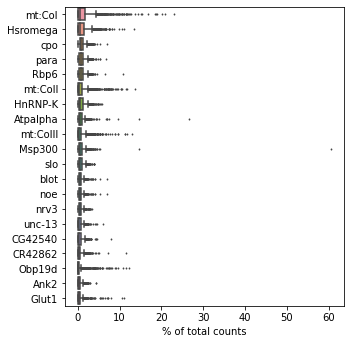

In [23]:
scanpy.pl.highest_expr_genes(amtx, n_top=20, )

In [24]:
scanpy.pp.calculate_qc_metrics(amtx, percent_top=None, log1p=False, inplace=True)

In [25]:
amtx

AnnData object with n_obs × n_vars = 1819 × 17472
    obs: 'n_genes_by_counts', 'total_counts'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [26]:
amtx.obs

n_genes_by_counts  total_counts
ORNnuclei_adult_nSybUNC84GFP_P6_F16               1148  9.999999e+05
ORN_10day_nuclei_P3_G9                             563  1.000000e+06
ORNnuclei_adult_nSybUNC84GFP_P7_N8                1626  1.000000e+06
ORNnuclei_adult_nSybUNC84GFP_P3_K16                792  9.999999e+05
ORNnuclei_adult_nSybUNC84GFP_P10_J2               1325  1.000000e+06
...                                                ...           ...
ORNnuclei_adult_nSybUNC84GFP_P2_H6                1180  1.000000e+06
ORNnuclei_adult_nSybUNC84GFP_P3_H6                 603  1.000000e+06
ORNnuclei_adult_nSybUNC84GFP_P1_B15               1165  1.000000e+06
ORNnuclei_adult_nSybUNC84GFP_P7_P14               1231  1.000000e+06
ORN_10day_nuclei_P3_N20                            953  1.000000e+06

[1819 rows x 2 columns]

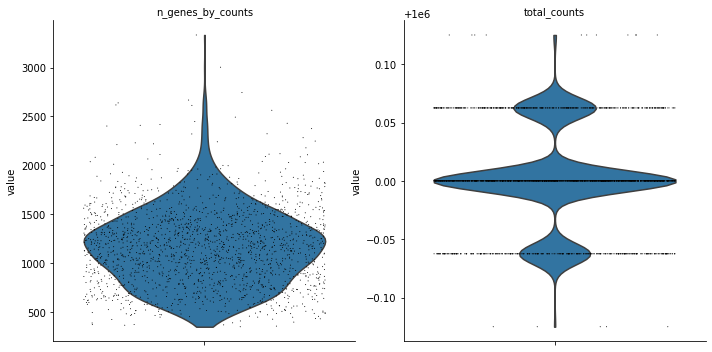

In [27]:
scanpy.pl.violin(amtx, ['n_genes_by_counts', 'total_counts'],
             jitter=0.4, multi_panel=True)

In [28]:
amtx.obs

n_genes_by_counts  total_counts
ORNnuclei_adult_nSybUNC84GFP_P6_F16               1148  9.999999e+05
ORN_10day_nuclei_P3_G9                             563  1.000000e+06
ORNnuclei_adult_nSybUNC84GFP_P7_N8                1626  1.000000e+06
ORNnuclei_adult_nSybUNC84GFP_P3_K16                792  9.999999e+05
ORNnuclei_adult_nSybUNC84GFP_P10_J2               1325  1.000000e+06
...                                                ...           ...
ORNnuclei_adult_nSybUNC84GFP_P2_H6                1180  1.000000e+06
ORNnuclei_adult_nSybUNC84GFP_P3_H6                 603  1.000000e+06
ORNnuclei_adult_nSybUNC84GFP_P1_B15               1165  1.000000e+06
ORNnuclei_adult_nSybUNC84GFP_P7_P14               1231  1.000000e+06
ORN_10day_nuclei_P3_N20                            953  1.000000e+06

[1819 rows x 2 columns]

In [29]:
scanpy.pp.log1p(amtx)

In [30]:
scanpy.pp.highly_variable_genes(amtx, min_mean=0.0125, max_mean=10, min_disp=0.5)

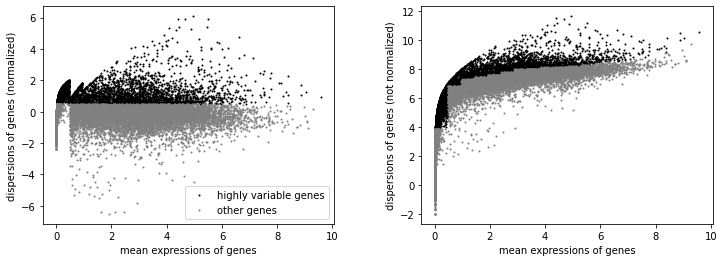

In [31]:
scanpy.pl.highly_variable_genes(amtx)

In [32]:
amtx.var[(amtx.var.index.isin(npall))]

n_cells_by_counts  mean_counts  pct_dropout_by_counts   total_counts  \
Dsk                      2     0.294262              99.890049     535.262695   
Eh                       1     0.001936              99.945025       3.521251   
FMRFa                    4     0.008393              99.780099      15.267558   
SP                       1     0.006611              99.945025      12.024777   
rk                      36     5.701402              98.020891   10370.849609   
...                    ...          ...                    ...            ...   
MsR2                    26     0.795449              98.570643    1446.920898   
Hr4                    246    19.261629              86.476086   35036.902344   
Pburs                    1     0.193944              99.945025     352.784485   
AstA-R1                687    67.013306              62.231996  121897.203125   
InR                    562   154.562881              69.103903  281149.875000   

         highly_variable     means  dispersions  dispersions_norm  
Dsk                 True  0.257941     5.920713          1.493507  
Eh                 False  0.001934     1.258816         -0.768532  
FMRFa              False  0.008358     1.857676         -0.477954  
SP                 False  0.006589     2.486969         -0.172609  
rk                  True  1.902317     7.962747          1.186466  
...                  ...       ...          ...               ...  
MsR2                True  0.585255     6.942423          0.633461  
Hr4                 True  3.008729     8.170388          0.784219  
Pburs               True  0.177262     5.865858          1.466890  
AstA-R1             True  4.219703     8.616939          1.328439  
InR                False  5.047050     7.399138         -0.832094  

[89 rows x 8 columns]

In [33]:
amtx.var[(amtx.var.index.isin(npall))]["highly_variable"].value_counts()

False    54
True     35
Name: highly_variable, dtype: int64

<AxesSubplot:>

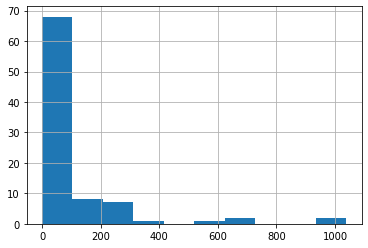

In [34]:
amtx.var[(amtx.var.index.isin(npall))]["n_cells_by_counts"].hist()

In [35]:
amtx.var[(amtx.var.index.isin(neuropeptides))]

n_cells_by_counts  mean_counts  pct_dropout_by_counts  \
Dsk                        2     0.294262              99.890049   
Eh                         1     0.001936              99.945025   
FMRFa                      4     0.008393              99.780099   
SP                         1     0.006611              99.945025   
Akh                        0     0.000000             100.000000   
Ms                        54     2.171623              97.031336   
Dh44                      25     0.424487              98.625618   
Ptth                       2     0.014347              99.890049   
Crz                        0     0.000000             100.000000   
AstA                       3     0.006882              99.835074   
Pdf                        0     0.000000             100.000000   
NPF                        6     1.249239              99.670148   
Hug                       15     2.315255              99.175371   
Lk                         9     0.520248              99.505223   
ETH                        4     0.100885              99.780099   
Dh31                      19     0.297268              98.955470   
AstC                       9     0.021840              99.505223   
AstCC                      0     0.000000             100.000000   
sNPF                     967   862.794312              46.838922   
Lst                        7     0.008068              99.615173   
Orcokinin                 21     8.080997              98.845520   
ITP                      213    85.980881              88.290269   
Nplp1                     21     4.334461              98.845520   
CNMa                       3     0.001631              99.835074   
Ilp2                       1     0.006787              99.945025   
Ilp8                       4     0.432892              99.780099   
Mip                        2     0.002576              99.890049   
Tk                         9     0.023617              99.505223   
CCHa2                     34     4.259799              98.130841   
CCHa1                      7     0.419747              99.615173   
Trissin                    0     0.000000             100.000000   
Burs                       0     0.000000             100.000000   
CCAP                       3     1.183048              99.835074   
Capa                      21     1.775082              98.845520   
Nplp4                      1     0.008580              99.945025   
Nplp2                     24     3.254513              98.680594   
Nplp3                      5     0.027764              99.725124   
Ilp7                       2     0.914144              99.890049   
Ilp6                      28     3.703946              98.460693   
Ilp5                       0     0.000000             100.000000   
Ilp4                       3     0.018401              99.835074   
Ilp3                       2     0.001135              99.890049   
Ilp1                       1     0.002756              99.945025   
Proc                      71    13.912979              96.096756   
SIFa                       8     0.030265              99.560198   
Gpb5                      52    14.540972              97.141286   
RYa                        1     0.004266              99.945025   
amn                      126    28.822367              93.073117   
Gpa2                       0     0.000000             100.000000   
Pburs                      1     0.193944              99.945025   

           total_counts  highly_variable         means  dispersions  \
Dsk        5.352627e+02             True  2.579407e-01     5.920713   
Eh         3.521251e+00            False  1.933946e-03     1.258816   
FMRFa      1.526756e+01            False  8.358352e-03     1.857676   
SP         1.202478e+01            False  6.588898e-03     2.486969   
Akh        0.000000e+00            False  1.000000e-12          NaN   
Ms         3.950183e+03            False  1.154243e+00     5.491652   
Dh44       7.721426e+02             True  3.5

<AxesSubplot:>

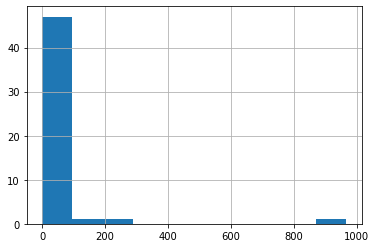

In [36]:
amtx.var[(amtx.var.index.isin(neuropeptides))]["n_cells_by_counts"].hist()

<AxesSubplot:>

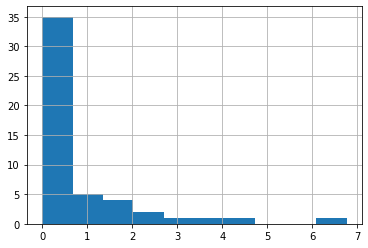

In [37]:
amtx.var[(amtx.var.index.isin(neuropeptides))]["means"].hist()

In [38]:
amtx.var[(amtx.var.index.isin(neuropeptides))]["highly_variable"].value_counts()

False    34
True     16
Name: highly_variable, dtype: int64

In [39]:
amtx.var[(amtx.var.index.isin(neuropeptide_receptors))]

n_cells_by_counts  mean_counts  pct_dropout_by_counts  \
rk                         36     5.701402              98.020891   
TkR99D                     19     0.101496              98.955470   
TkR86C                    188    61.907356              89.664651   
RYa-R                     666     2.731047              63.386476   
Lgr1                      188    69.258568              89.664651   
AkhR                        8     0.048196              99.560198   
Proc-R                     36     2.208822              98.020891   
SPR                       203    49.340881              88.840022   
CCKLR-17D3                 33    10.431664              98.185816   
CCHa2-R                    18     0.071208              99.010445   
Dh44-R2                   236     5.507901              87.025838   
Dh44-R1                   144    42.994896              92.083562   
MsR1                       76    22.868450              95.821880   
FMRFaR                    247    49.667873              86.421111   
Lkr                        36     7.659731              98.020891   
CrzR                       21     4.389763              98.845520   
AstC-R2                   133    48.348282              92.688290   
AstC-R1                    26     0.954730              98.570643   
sNPF-R                    261    95.581856              85.651457   
CapaR                       4     0.031374              99.780099   
NPFR                      132    35.860012              92.743266   
PK2-R2                      2     0.001560              99.890049   
PK2-R1                      7     0.044494              99.615173   
PK1-R                      24     7.208145              98.680594   
ETHR                      270    95.954918              85.156679   
SIFaR                      80    21.418476              95.601979   
CCAP-R                     56     0.940011              96.921385   
AstA-R2                     6     0.115442              99.670148   
CCHa1-R                    52     6.394906              97.141286   
Dh31-R                    167    89.686272              90.819131   
CNMaR                      43    13.495537              97.636064   
TrissinR                 1039   168.326538              42.880704   
CCKLR-17D1                367   142.904709              79.824079   
Pdfr                      304   107.670845              83.287521   
MsR2                       26     0.795449              98.570643   
Hr4                       246    19.261629              86.476086   
AstA-R1                   687    67.013306              62.231996   
InR                       562   154.562881              69.103903   

             total_counts  highly_variable     means  dispersions  \
rk           10370.849609             True  1.902317     7.962747   
TkR99D         184.622025            False  0.096670     3.394589   
TkR86C      112609.484375            False  4.141663     7.702686   
RYa-R         4967.775391            False  1.316688     4.658708   
Lgr1        125981.328125            False  4.252182     7.965572   
AkhR            87.668526            False  0.047071     3.393560   
Proc-R        4017.847900             True  1.165904     7.778600   
SPR          89751.062500             True  3.918817     8.888236   
CCKLR-17D3   18975.195312             True  2.436387     7.873638   
CCHa2-R        129.526947            False  0.068787     3.433468   
Dh44-R2      10018.872070            False  1.873017     6.354668   
Dh44-R1      78207.718750             True  3.784073     8.348435   
MsR1         41597.710938            False  3.172557     7.777427   
FMRFaR       90345.859375            False  3.925292     7.363504   
Lkr          13933.051758             True  2.158684     9.469504   
CrzR          7984.979492             True  1.684501     7.884594   
AstC-R2      87945.523438             True  3.898903     8.330570   
AstC-R1       1736.653442            False  0.670252     6.584546   
sNPF-R   

<AxesSubplot:>

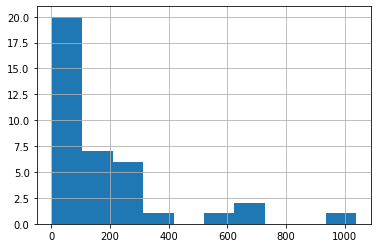

In [40]:
amtx.var[(amtx.var.index.isin(neuropeptide_receptors))]["n_cells_by_counts"].hist()

<AxesSubplot:>

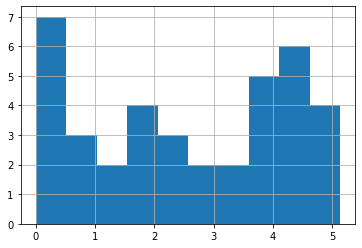

In [41]:
amtx.var[(amtx.var.index.isin(neuropeptide_receptors))]["means"].hist()

In [42]:
amtx.var[(amtx.var.index.isin(spab))]

n_cells_by_counts  mean_counts  pct_dropout_by_counts  total_counts  \
CG2816                  1     0.002633              99.945025       4.78902   

        highly_variable     means  dispersions  dispersions_norm  
CG2816            False  0.002629     1.566326         -0.619322

In [43]:
highly_variable_list = amtx.var.highly_variable.reset_index()# %%
the_genes = highly_variable_list[highly_variable_list["highly_variable"]]["index"]

In [44]:
highly_variable_list

index  highly_variable
0      7SLRNA:CR32864            False
1                   a             True
2               abd-A            False
3               Abd-B            False
4                 Abl            False
...               ...              ...
17467             Tlk            False
17468             muc            False
17469             THG            False
17470           Rap2l            False
17471        mCD8-GFP            False

[17472 rows x 2 columns]

In [45]:
pd.set_option('display.max_rows', 500)

In [46]:
amtx.var.highly_variable

7SLRNA:CR32864    False
a                  True
abd-A             False
Abd-B             False
Abl               False
                  ...  
Tlk               False
muc               False
THG               False
Rap2l             False
mCD8-GFP          False
Name: highly_variable, Length: 17472, dtype: bool

In [47]:
amtx

AnnData object with n_obs × n_vars = 1819 × 17472
    obs: 'n_genes_by_counts', 'total_counts'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

In [48]:
amtx[:, amtx.var.highly_variable]

View of AnnData object with n_obs × n_vars = 1819 × 4065
    obs: 'n_genes_by_counts', 'total_counts'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

In [49]:
#amtx[:, (amtx.var.index.isin(npall)) | (amtx.var.highly_variable)]
amtx[:, (amtx.var.index.isin(npall))]

View of AnnData object with n_obs × n_vars = 1819 × 89
    obs: 'n_genes_by_counts', 'total_counts'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

In [50]:
amtx = amtx[:, (amtx.var.index.isin(npall))]

In [51]:
scanpy.pp.regress_out(amtx, ['total_counts'])

In [52]:
amtx

AnnData object with n_obs × n_vars = 1819 × 89
    obs: 'n_genes_by_counts', 'total_counts'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

In [53]:
amtx.to_df()

Dsk        Eh     FMRFa        SP  \
ORNnuclei_adult_nSybUNC84GFP_P6_F16  0.001905  0.001156 -0.000567 -0.005032   
ORN_10day_nuclei_P3_G9              -0.005618 -0.000763 -0.002808 -0.001532   
ORNnuclei_adult_nSybUNC84GFP_P7_N8  -0.005618 -0.000763 -0.002808 -0.001532   
ORNnuclei_adult_nSybUNC84GFP_P3_K16  0.001905  0.001156 -0.000567 -0.005032   
ORNnuclei_adult_nSybUNC84GFP_P10_J2 -0.013140 -0.002682 -0.005050  0.001968   
...                                       ...       ...       ...       ...   
ORNnuclei_adult_nSybUNC84GFP_P2_H6  -0.005618 -0.000763 -0.002808 -0.001532   
ORNnuclei_adult_nSybUNC84GFP_P3_H6  -0.005618 -0.000763 -0.002808 -0.001532   
ORNnuclei_adult_nSybUNC84GFP_P1_B15 -0.005618 -0.000763 -0.002808 -0.001532   
ORNnuclei_adult_nSybUNC84GFP_P7_P14 -0.005618 -0.000763 -0.002808 -0.001532   
ORN_10day_nuclei_P3_N20             -0.005618 -0.000763 -0.002808 -0.001532   

                                           rk  Akh    TkR99D    TkR86C  \
ORNnuclei_adult_nSybUNC84GFP_P6_F16 -0.038893  0.0 -0.019837 -0.533785   
ORN_10day_nuclei_P3_G9              -0.063124  0.0 -0.018277 -0.488274   
ORNnuclei_adult_nSybUNC84GFP_P7_N8  -0.063124  0.0 -0.018277 -0.488274   
ORNnuclei_adult_nSybUNC84GFP_P3_K16 -0.038893  0.0 -0.019837 -0.533785   
ORNnuclei_adult_nSybUNC84GFP_P10_J2 -0.087354  0.0 -0.016717 -0.442762   
...                                       ...  ...       ...       ...   
ORNnuclei_adult_nSybUNC84GFP_P2_H6  -0.063124  0.0 -0.018277 -0.488274   
ORNnuclei_adult_nSybUNC84GFP_P3_H6  -0.063124  0.0 -0.018277 -0.488274   
ORNnuclei_adult_nSybUNC84GFP_P1_B15 -0.063124  0.0 -0.018277 -0.488274   
ORNnuclei_adult_nSybUNC84GFP_P7_P14 -0.063124  0.0 -0.018277 -0.488274   
ORN_10day_nuclei_P3_N20             -0.063124  0.0 -0.018277 -0.488274   

                                        RYa-R        Ms  ...       RYa  \
ORNnuclei_adult_nSybUNC84GFP_P6_F16 -0.574219 -0.058719  ... -0.001296   
ORN_10day_nuclei_P3_G9              -0.579159 -0.095630  ... -0.001196   
ORNnuclei_adult_nSybUNC84GFP_P7_N8  -0.579159 -0.095630  ... -0.001196   
ORNnuclei_adult_nSybUNC84GFP_P3_K16 -0.574219 -0.058719  ... -0.001296   
ORNnuclei_adult_nSybUNC84GFP_P10_J2 -0.584099 -0.132541  ... -0.001097   
...                                       ...       ...  ...       ...   
ORNnuclei_adult_nSybUNC84GFP_P2_H6  -0.579159 -0.095630  ... -0.001196   
ORNnuclei_adult_nSybUNC84GFP_P3_H6   1.380294 -0.095630  ... -0.001196   
ORNnuclei_adult_nSybUNC84GFP_P1_B15  0.027306 -0.095630  ... -0.001196   
ORNnuclei_adult_nSybUNC84GFP_P7_P14 -0.579159 -0.095630  ... -0.001196   
ORN_10day_nuclei_P3_N20              0.451206 -0.095630  ... -0.001196   

                                          amn  CCKLR-17D1      Pdfr  Gpa2  \
ORNnuclei_adult_nSybUNC84GFP_P6_F16 -0.416535   -1.004619  4.021186   0.0   
ORN_10day_nuclei_P3_G9              -0.337340   -1.028131 -0.746171   0.0   
ORNnuclei_adult_nSybUNC84GFP_P7_N8  -0.337340   -1.028131 -0.746171   0.0   
ORNnuclei_adult_nSybUNC84GFP_P3_K16 -0.416535   -1.004619 -0.721086   0.0   
ORNnuclei_adult_nSybUNC84GFP_P10_J2 -0.258145   -1.051643 -0.771256   0.0   
...                                       ...         ...       ...   ...   
ORNnuclei_adult_nSybUNC84GFP_P2_H6  -0.337340   -1.028131  6.538334   0.0   
ORNnuclei_adult_nSybUNC84GFP_P3_H6  -0.337340   -1.028131 -0.746171   0.0   
ORNnuclei_adult_nSybUNC84GFP_P1_B15 -0.337340    4.777223 -0.746171   0.0   
ORNnuclei_adult_nSybUNC84GFP_P7_P14 -0.337340    5.811879  3.626985   0.0   
ORN_10day_nuclei_P3_N20             -0.337340   -1.028131 -0.746171   0.0   

                                         MsR2       Hr4     Pburs   AstA-R1  \
ORNnuclei_adult_nSybUNC84GFP_P6_F16 -0.014815  2.593966 -0.003503  2.157849   
ORN_10day_nuclei_P3_G9              -0.028073  3.439895 -0.003236 -0.819191   
ORNnuclei_adult_nSybUNC84GFP_P7_N8  -0.028073 -0.364488 -0.003236 -0.819191   
ORNnuclei_adult_nSybUNC84GFP_P3_K16 -0.014815 -0.399218 -0.003503 -0.83533

In [54]:
scanpy.pp.scale(amtx, max_value=10)

In [55]:
amtx.to_df()

Dsk        Eh     FMRFa        SP  \
ORNnuclei_adult_nSybUNC84GFP_P6_F16  0.010652  0.032711 -0.008005 -0.083672   
ORN_10day_nuclei_P3_G9              -0.031416 -0.021581 -0.039681 -0.025479   
ORNnuclei_adult_nSybUNC84GFP_P7_N8  -0.031416 -0.021581 -0.039681 -0.025479   
ORNnuclei_adult_nSybUNC84GFP_P3_K16  0.010652  0.032711 -0.008005 -0.083672   
ORNnuclei_adult_nSybUNC84GFP_P10_J2 -0.073484 -0.075873 -0.071357  0.032714   
...                                       ...       ...       ...       ...   
ORNnuclei_adult_nSybUNC84GFP_P2_H6  -0.031416 -0.021581 -0.039681 -0.025479   
ORNnuclei_adult_nSybUNC84GFP_P3_H6  -0.031416 -0.021581 -0.039681 -0.025479   
ORNnuclei_adult_nSybUNC84GFP_P1_B15 -0.031416 -0.021581 -0.039681 -0.025479   
ORNnuclei_adult_nSybUNC84GFP_P7_P14 -0.031416 -0.021581 -0.039681 -0.025479   
ORN_10day_nuclei_P3_N20             -0.031416 -0.021581 -0.039681 -0.025479   

                                           rk  Akh    TkR99D    TkR86C  \
ORNnuclei_adult_nSybUNC84GFP_P6_F16 -0.072337  0.0 -0.094868 -0.333617   
ORN_10day_nuclei_P3_G9              -0.117403  0.0 -0.087408 -0.305172   
ORNnuclei_adult_nSybUNC84GFP_P7_N8  -0.117403  0.0 -0.087408 -0.305172   
ORNnuclei_adult_nSybUNC84GFP_P3_K16 -0.072337  0.0 -0.094868 -0.333617   
ORNnuclei_adult_nSybUNC84GFP_P10_J2 -0.162469  0.0 -0.079948 -0.276728   
...                                       ...  ...       ...       ...   
ORNnuclei_adult_nSybUNC84GFP_P2_H6  -0.117403  0.0 -0.087408 -0.305172   
ORNnuclei_adult_nSybUNC84GFP_P3_H6  -0.117403  0.0 -0.087408 -0.305172   
ORNnuclei_adult_nSybUNC84GFP_P1_B15 -0.117403  0.0 -0.087408 -0.305172   
ORNnuclei_adult_nSybUNC84GFP_P7_P14 -0.117403  0.0 -0.087408 -0.305172   
ORN_10day_nuclei_P3_N20             -0.117403  0.0 -0.087408 -0.305172   

                                        RYa-R        Ms  ...       RYa  \
ORNnuclei_adult_nSybUNC84GFP_P6_F16 -0.635268 -0.095369  ... -0.025461   
ORN_10day_nuclei_P3_G9              -0.640734 -0.155319  ... -0.023514   
ORNnuclei_adult_nSybUNC84GFP_P7_N8  -0.640734 -0.155319  ... -0.023514   
ORNnuclei_adult_nSybUNC84GFP_P3_K16 -0.635268 -0.095369  ... -0.025461   
ORNnuclei_adult_nSybUNC84GFP_P10_J2 -0.646199 -0.215270  ... -0.021568   
...                                       ...       ...  ...       ...   
ORNnuclei_adult_nSybUNC84GFP_P2_H6  -0.640734 -0.155319  ... -0.023514   
ORNnuclei_adult_nSybUNC84GFP_P3_H6   1.527044 -0.155319  ... -0.023514   
ORNnuclei_adult_nSybUNC84GFP_P1_B15  0.030209 -0.155319  ... -0.023514   
ORNnuclei_adult_nSybUNC84GFP_P7_P14 -0.640734 -0.155319  ... -0.023514   
ORN_10day_nuclei_P3_N20              0.499178 -0.155319  ... -0.023514   

                                          amn  CCKLR-17D1      Pdfr  Gpa2  \
ORNnuclei_adult_nSybUNC84GFP_P6_F16 -0.315656   -0.446663  2.108858   0.0   
ORN_10day_nuclei_P3_G9              -0.255641   -0.457116 -0.391319   0.0   
ORNnuclei_adult_nSybUNC84GFP_P7_N8  -0.255641   -0.457116 -0.391319   0.0   
ORNnuclei_adult_nSybUNC84GFP_P3_K16 -0.315656   -0.446663 -0.378164   0.0   
ORNnuclei_adult_nSybUNC84GFP_P10_J2 -0.195626   -0.467570 -0.404475   0.0   
...                                       ...         ...       ...   ...   
ORNnuclei_adult_nSybUNC84GFP_P2_H6  -0.255641   -0.457116  3.428944   0.0   
ORNnuclei_adult_nSybUNC84GFP_P3_H6  -0.255641   -0.457116 -0.391319   0.0   
ORNnuclei_adult_nSybUNC84GFP_P1_B15 -0.255641    2.123996 -0.391319   0.0   
ORNnuclei_adult_nSybUNC84GFP_P7_P14 -0.255641    2.584014  1.902125   0.0   
ORN_10day_nuclei_P3_N20             -0.255641   -0.457116 -0.391319   0.0   

                                         MsR2       Hr4     Pburs   AstA-R1  \
ORNnuclei_adult_nSybUNC84GFP_P6_F16 -0.050772  2.340534 -0.025461  1.413860   
ORN_10day_nuclei_P3_G9              -0.096210  3.103816 -0.023514 -0.536748   
ORNnuclei_adult_nSybUNC84GFP_P7_N8  -0.096210 -0.328878 -0.023514 -0.536748   
ORNnuclei_adult_nSybUNC84GFP_P3_K16 -0.050772 -0.360214 -0.025461 -0.54732

In [56]:
scanpy.tl.pca(amtx, svd_solver='arpack')

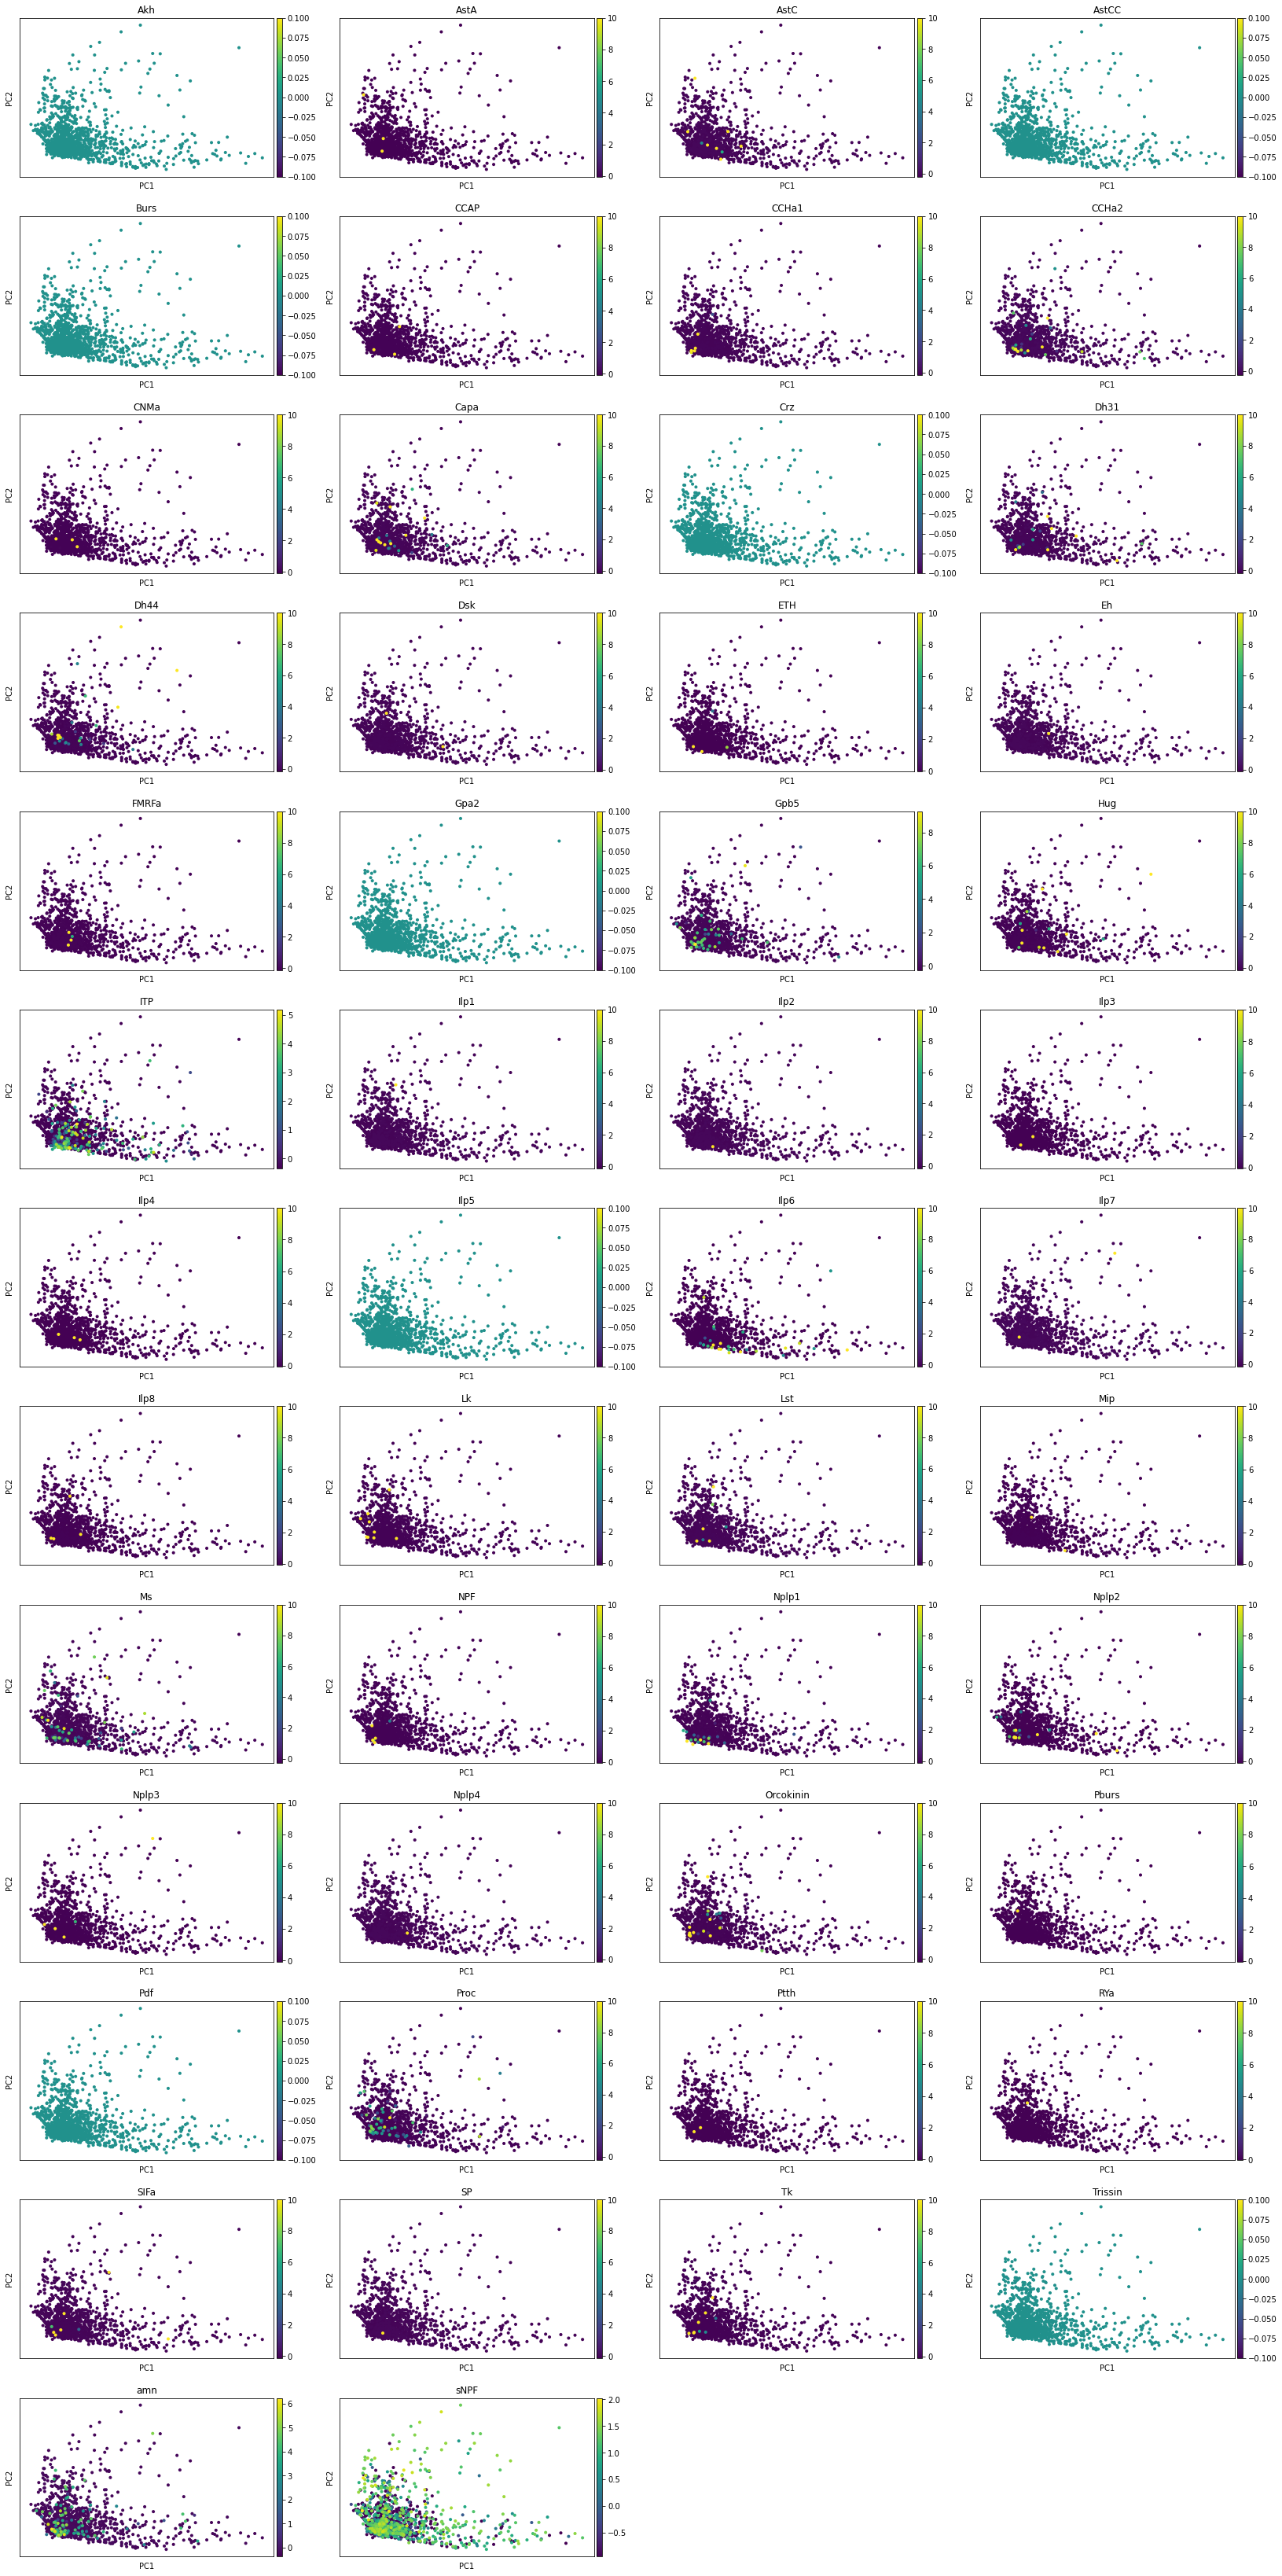

In [57]:
scanpy.pl.pca(amtx, color=neuropeptides[:-1])

In [58]:
#used 40, 10
#used 100, 20
scanpy.pp.neighbors(amtx, n_neighbors=100, n_pcs=20)

In [59]:
scanpy.tl.umap(amtx)

In [60]:
amtx

AnnData object with n_obs × n_vars = 1819 × 89
    obs: 'n_genes_by_counts', 'total_counts'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

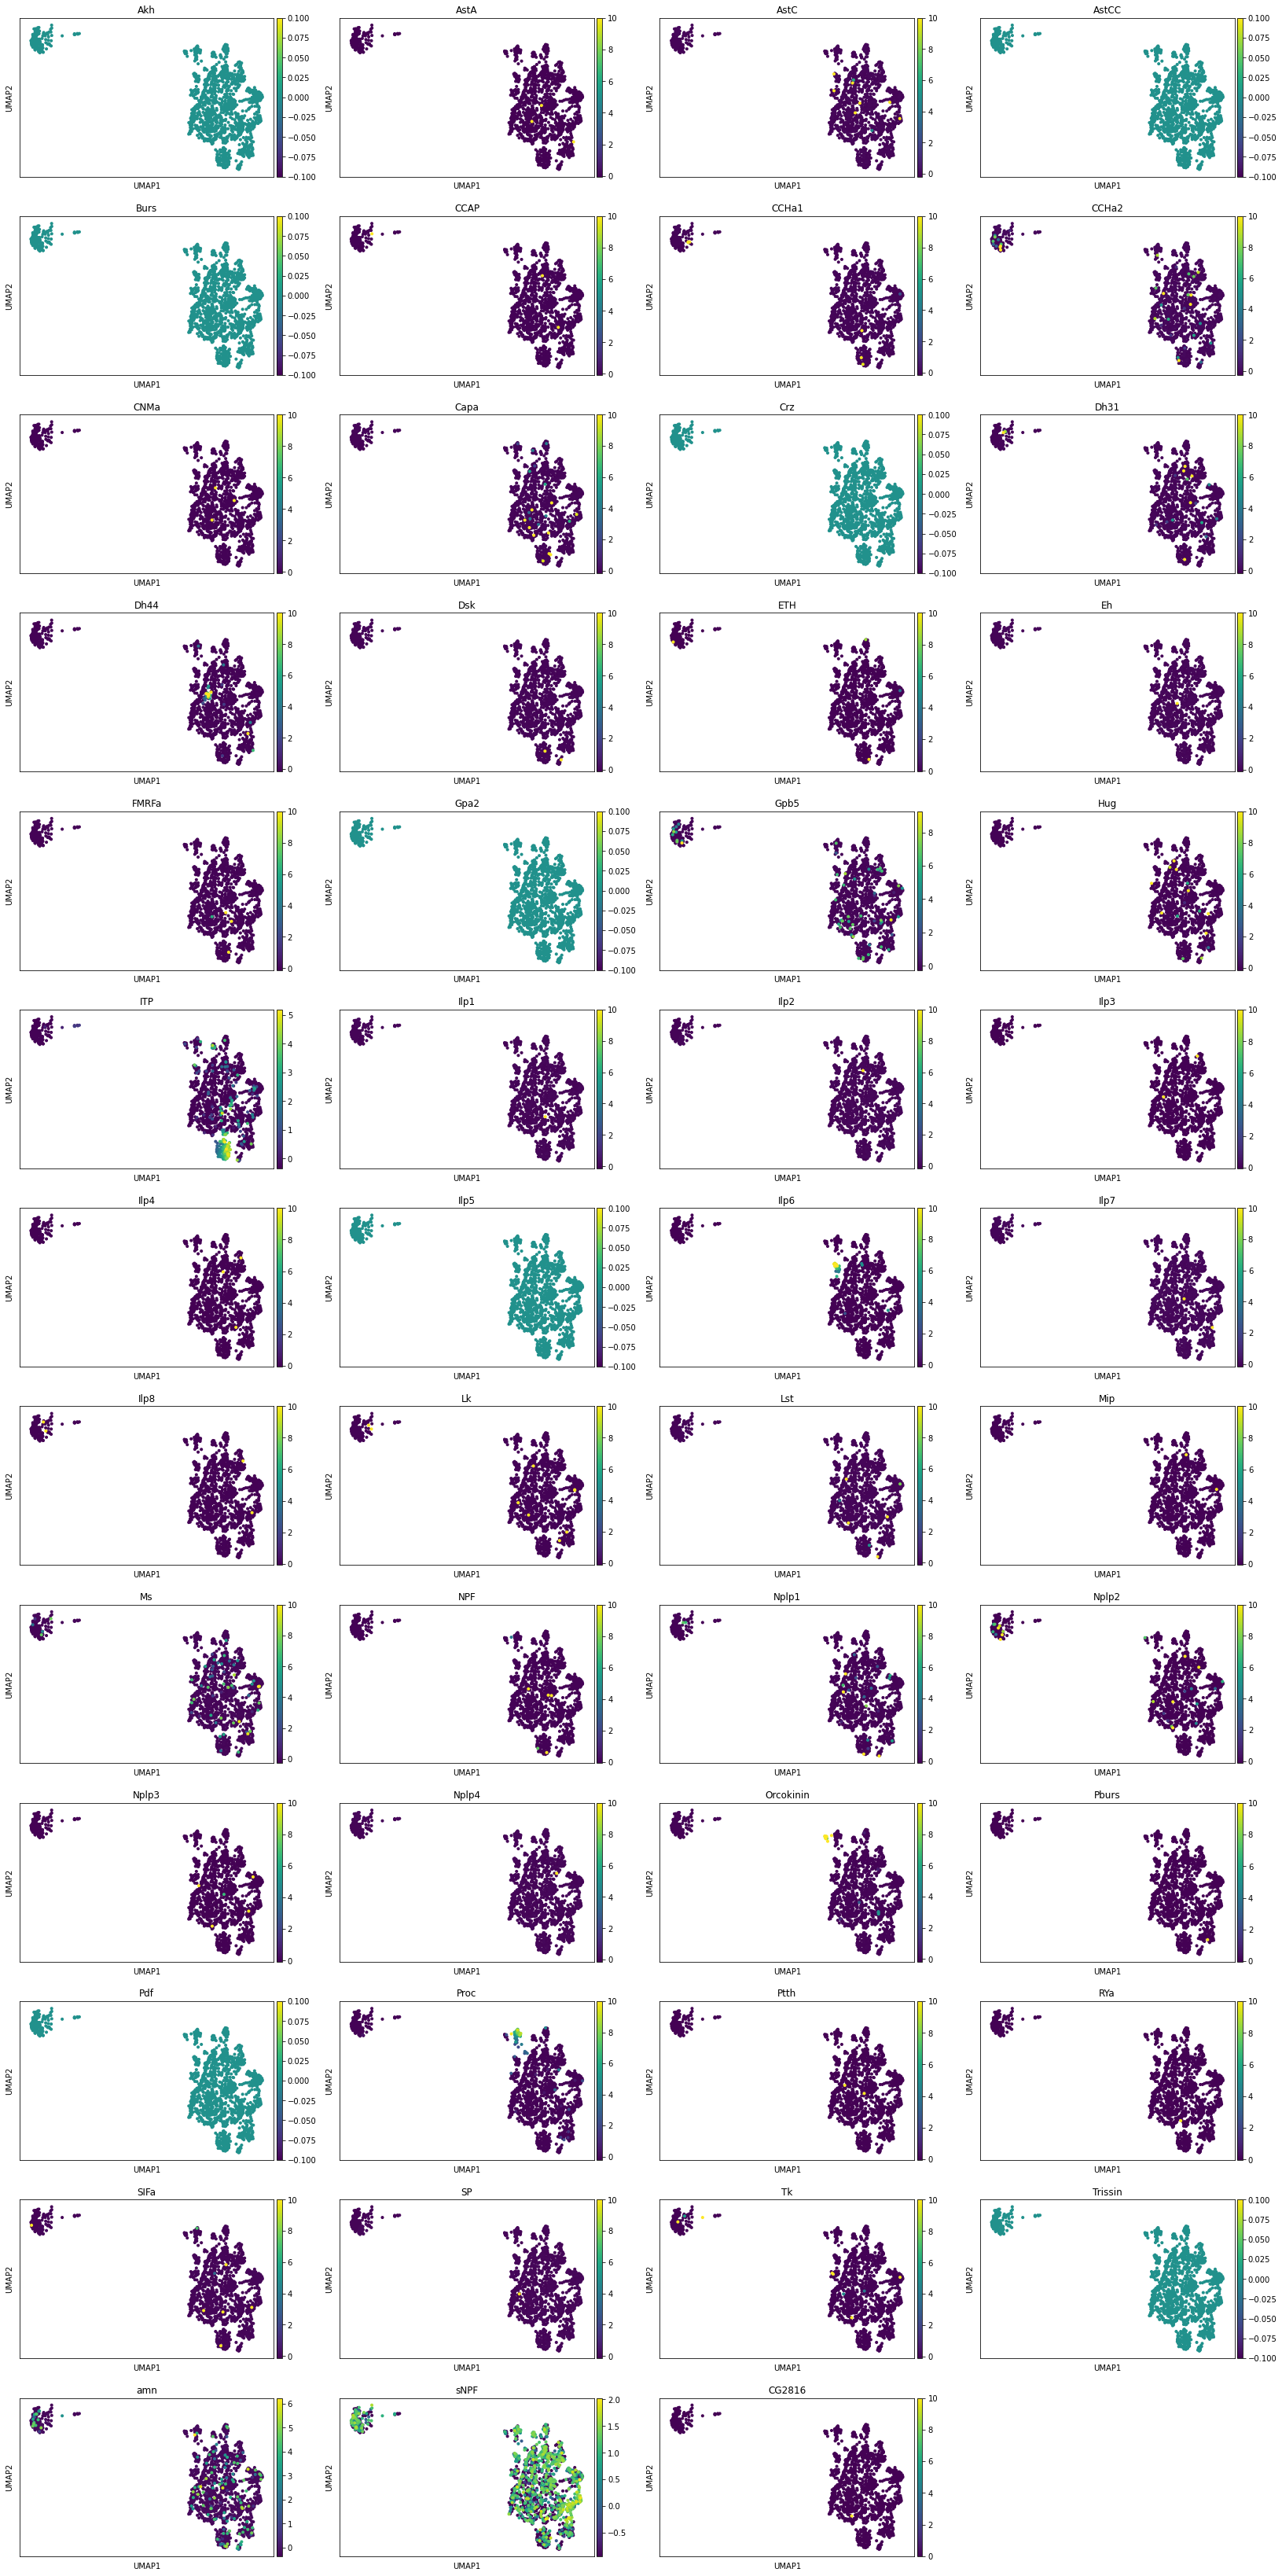

In [61]:
scanpy.pl.umap(amtx, color=neuropeptides[:-1]+spab )

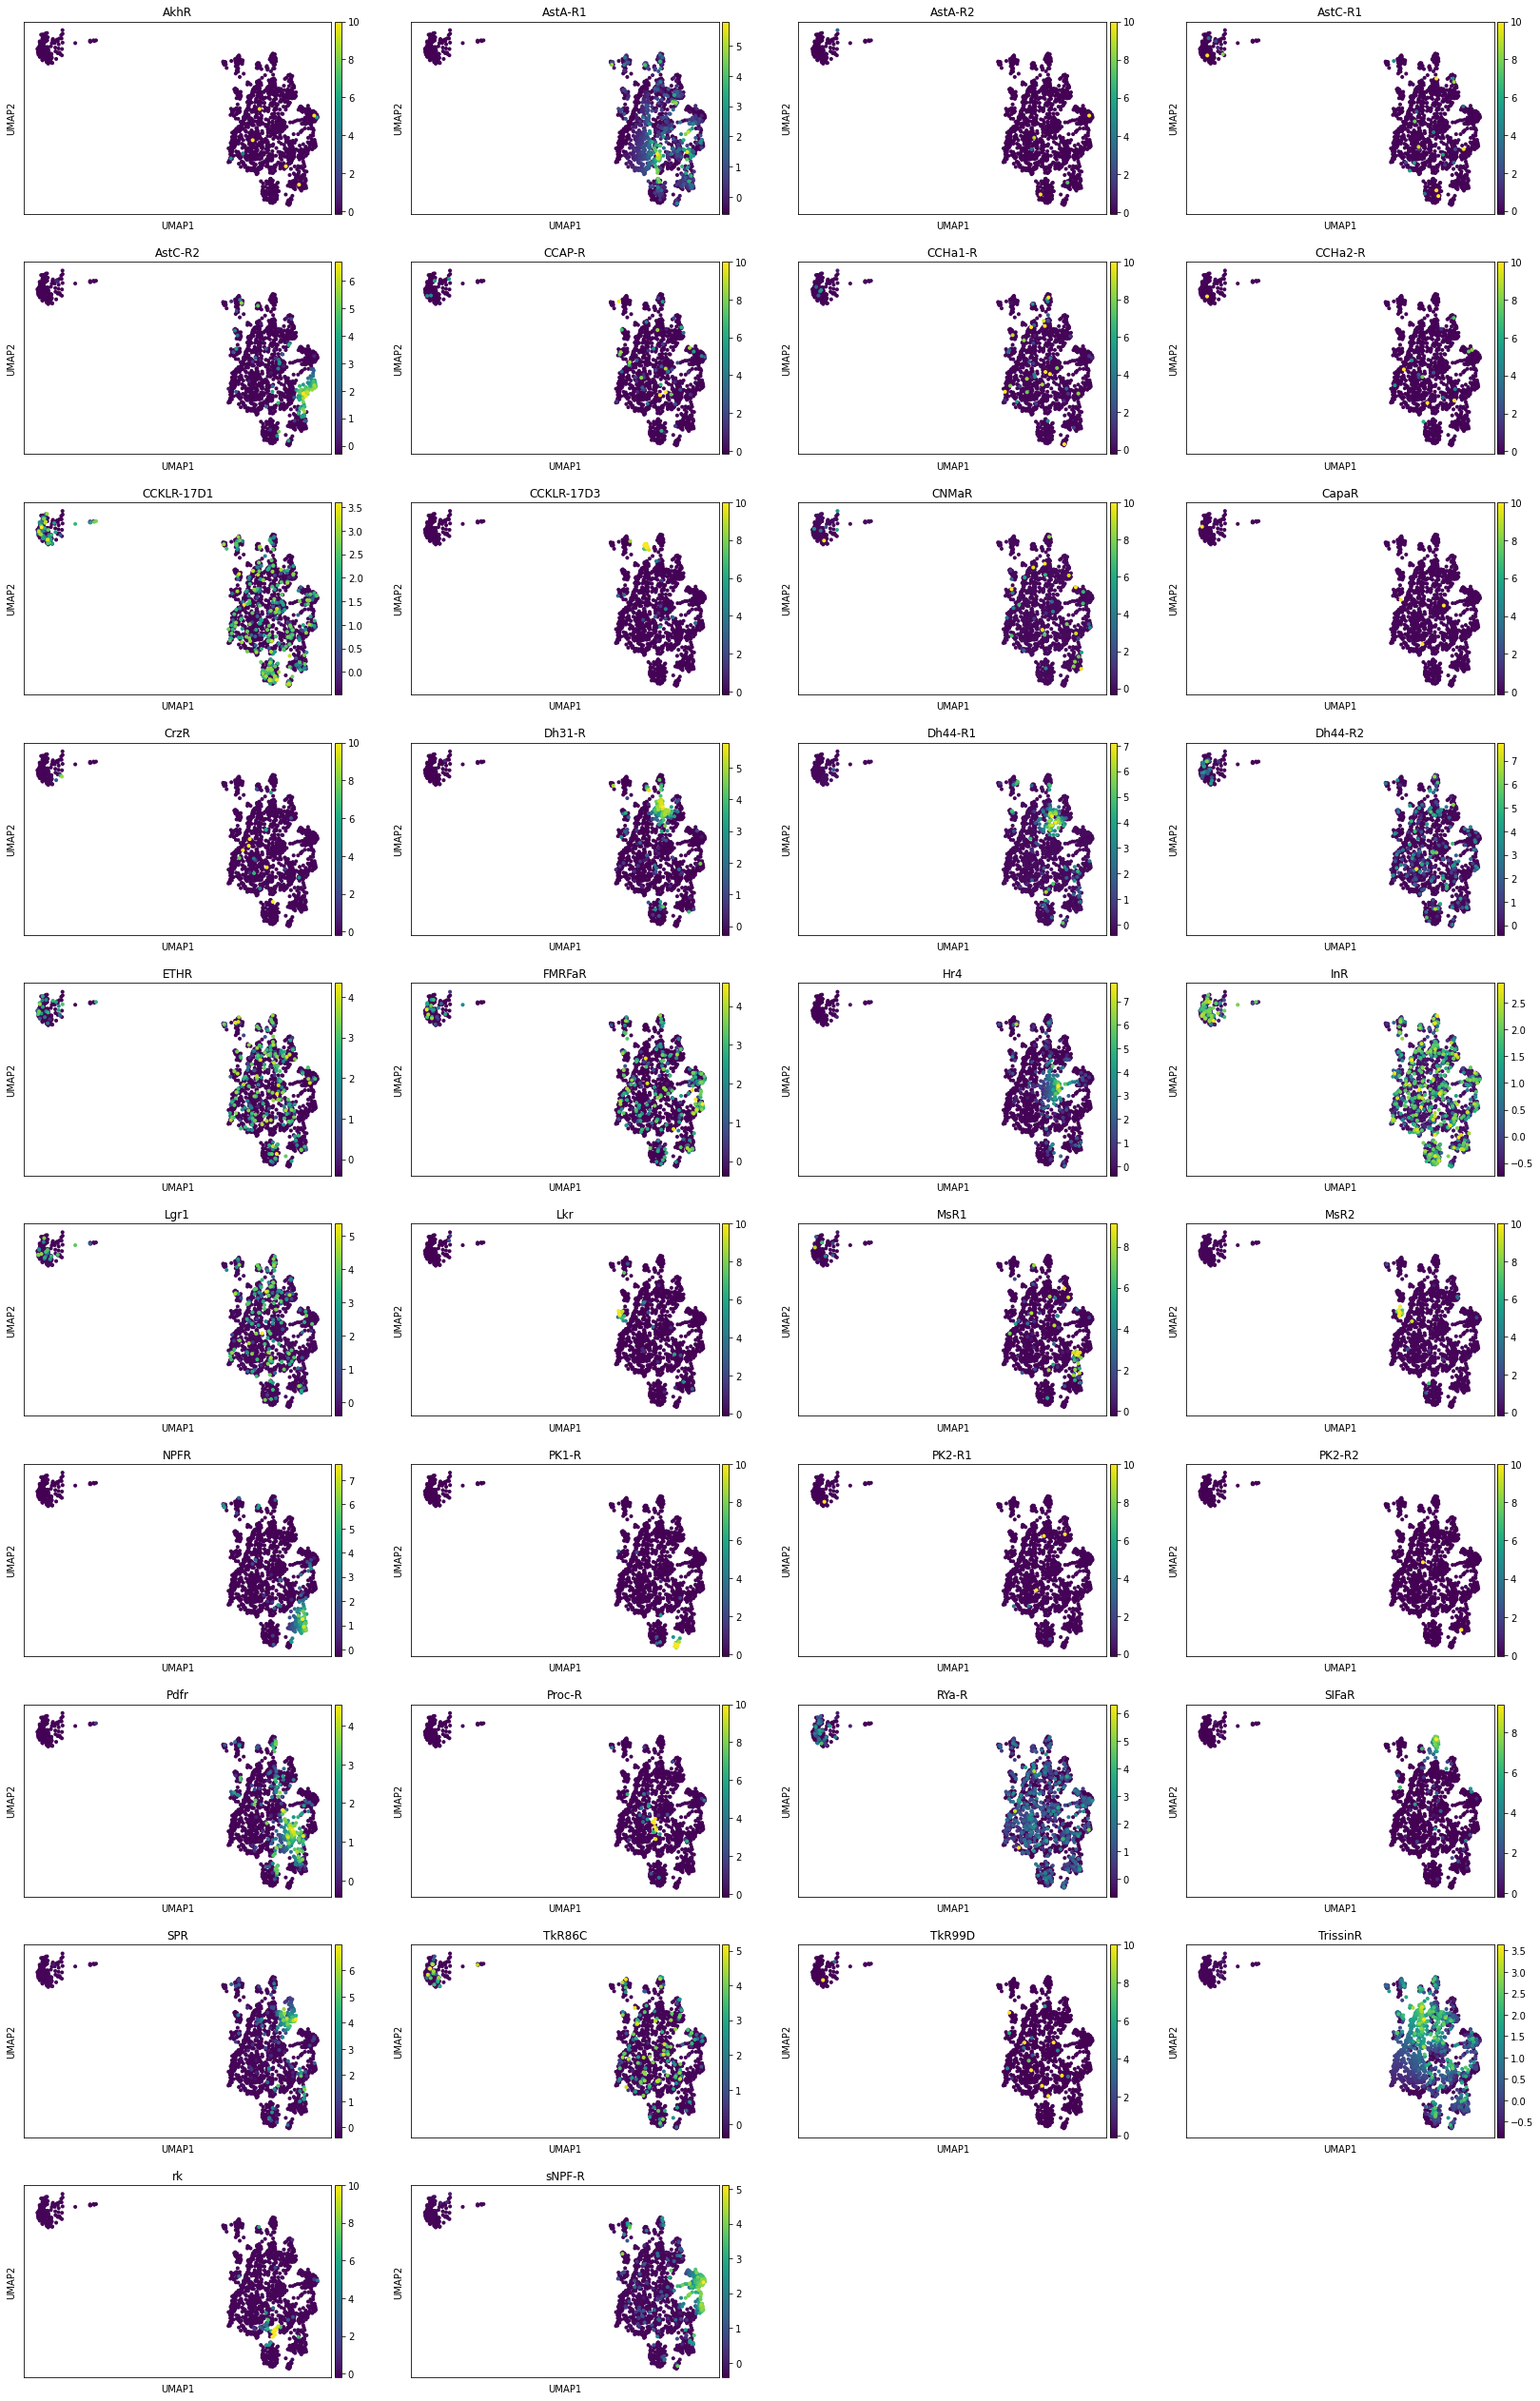

In [62]:
scanpy.pl.umap(amtx, color=neuropeptide_receptors )

In [63]:
neuropeptides[:-1]

['Akh',
 'AstA',
 'AstC',
 'AstCC',
 'Burs',
 'CCAP',
 'CCHa1',
 'CCHa2',
 'CNMa',
 'Capa',
 'Crz',
 'Dh31',
 'Dh44',
 'Dsk',
 'ETH',
 'Eh',
 'FMRFa',
 'Gpa2',
 'Gpb5',
 'Hug',
 'ITP',
 'Ilp1',
 'Ilp2',
 'Ilp3',
 'Ilp4',
 'Ilp5',
 'Ilp6',
 'Ilp7',
 'Ilp8',
 'Lk',
 'Lst',
 'Mip',
 'Ms',
 'NPF',
 'Nplp1',
 'Nplp2',
 'Nplp3',
 'Nplp4',
 'Orcokinin',
 'Pburs',
 'Pdf',
 'Proc',
 'Ptth',
 'RYa',
 'SIFa',
 'SP',
 'Tk',
 'Trissin',
 'amn',
 'sNPF']

In [64]:
scanpy.tl.leiden(amtx, key_added='clusters')

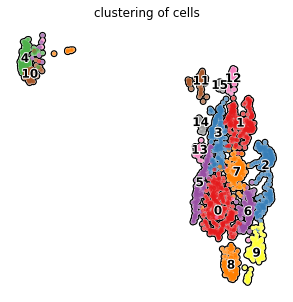

In [65]:
from matplotlib.pyplot import rc_context
with rc_context({'figure.figsize': (5, 5)}):
    scanpy.pl.umap(amtx, color='clusters', add_outline=True, legend_loc='on data',
               legend_fontsize=12, legend_fontoutline=2,frameon=False,
               title='clustering of cells', palette='Set1')

In [67]:
glomerular_mappings = glomerular_mappings[["index", "annotated"]]
glomerular_mappings_set_index = pd.DataFrame(list(glomerular_mappings["annotated"]),index=list(glomerular_mappings["index"]))
glomerular_mappings_set_index.rename(columns={0 : "annotated"}, inplace=True)
cells = list(glomerular_mappings["index"])
amtx.obs.loc[cells, "annotated"] = glomerular_mappings_set_index.loc[cells,"annotated"]
amtx_f = amtx[(amtx.obs.annotated != 'unannotated')]


/home/yma781/py38/lib/python3.8/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


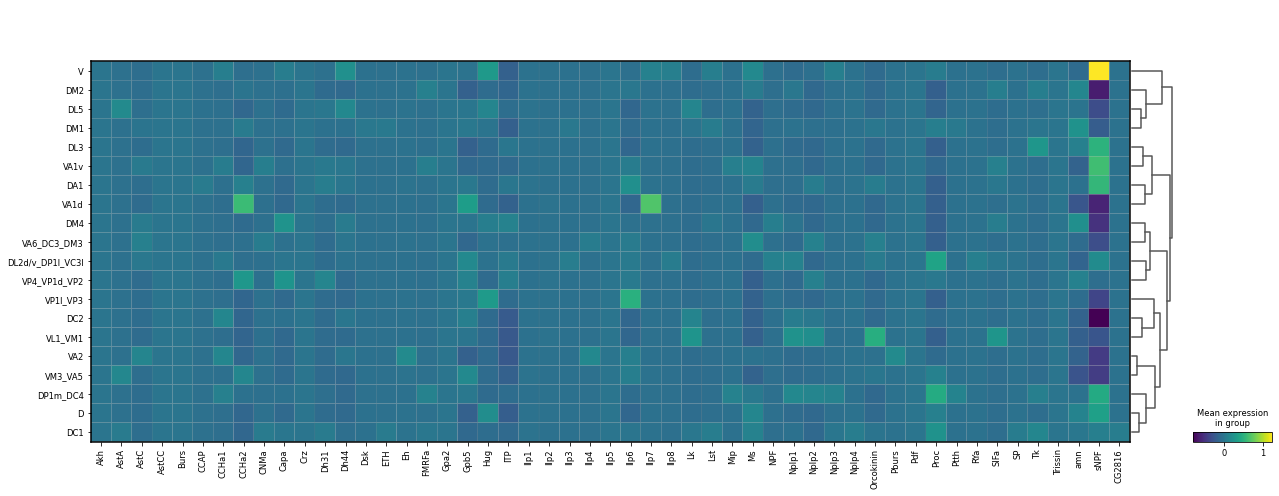

In [68]:
scanpy.pl.matrixplot(amtx_f, neuropeptides[:-1]+spab, groupby='annotated', dendrogram=True)

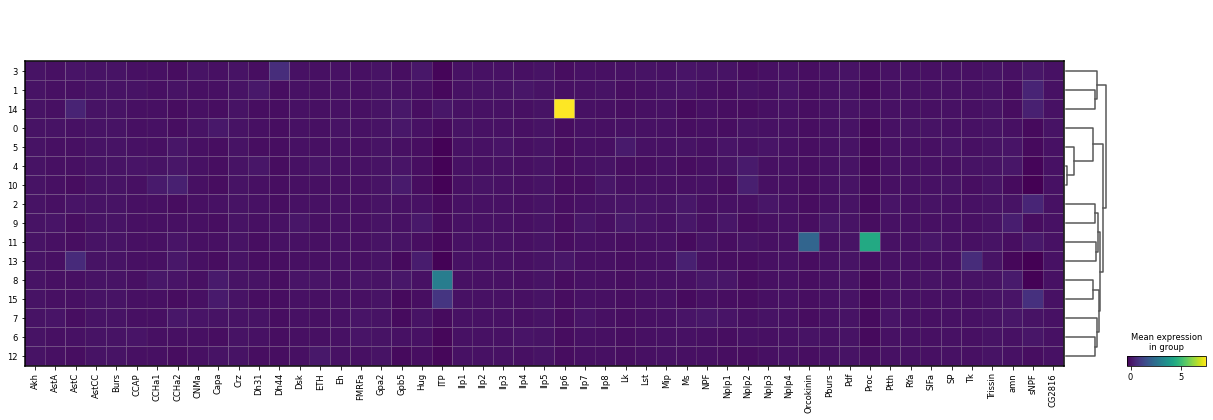

In [66]:
scanpy.pl.matrixplot(amtx, neuropeptides[:-1]+spab, groupby='clusters', dendrogram=True)

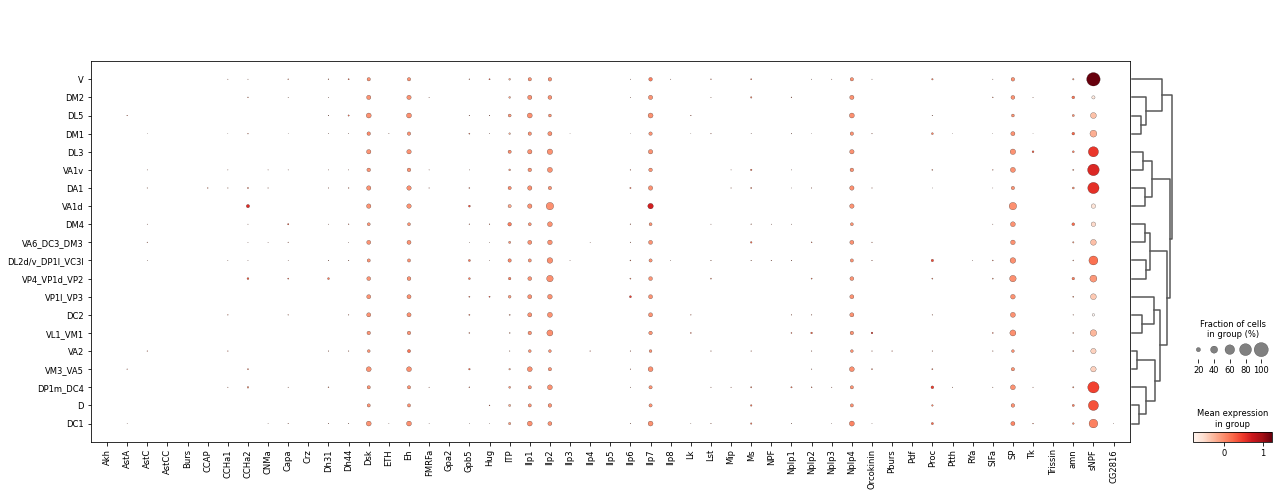

In [69]:
scanpy.pl.dotplot(amtx_f, neuropeptides[:-1]+spab, groupby='annotated', dendrogram=True)

/Users/yazatian/Desktop/rnaseq/sca/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


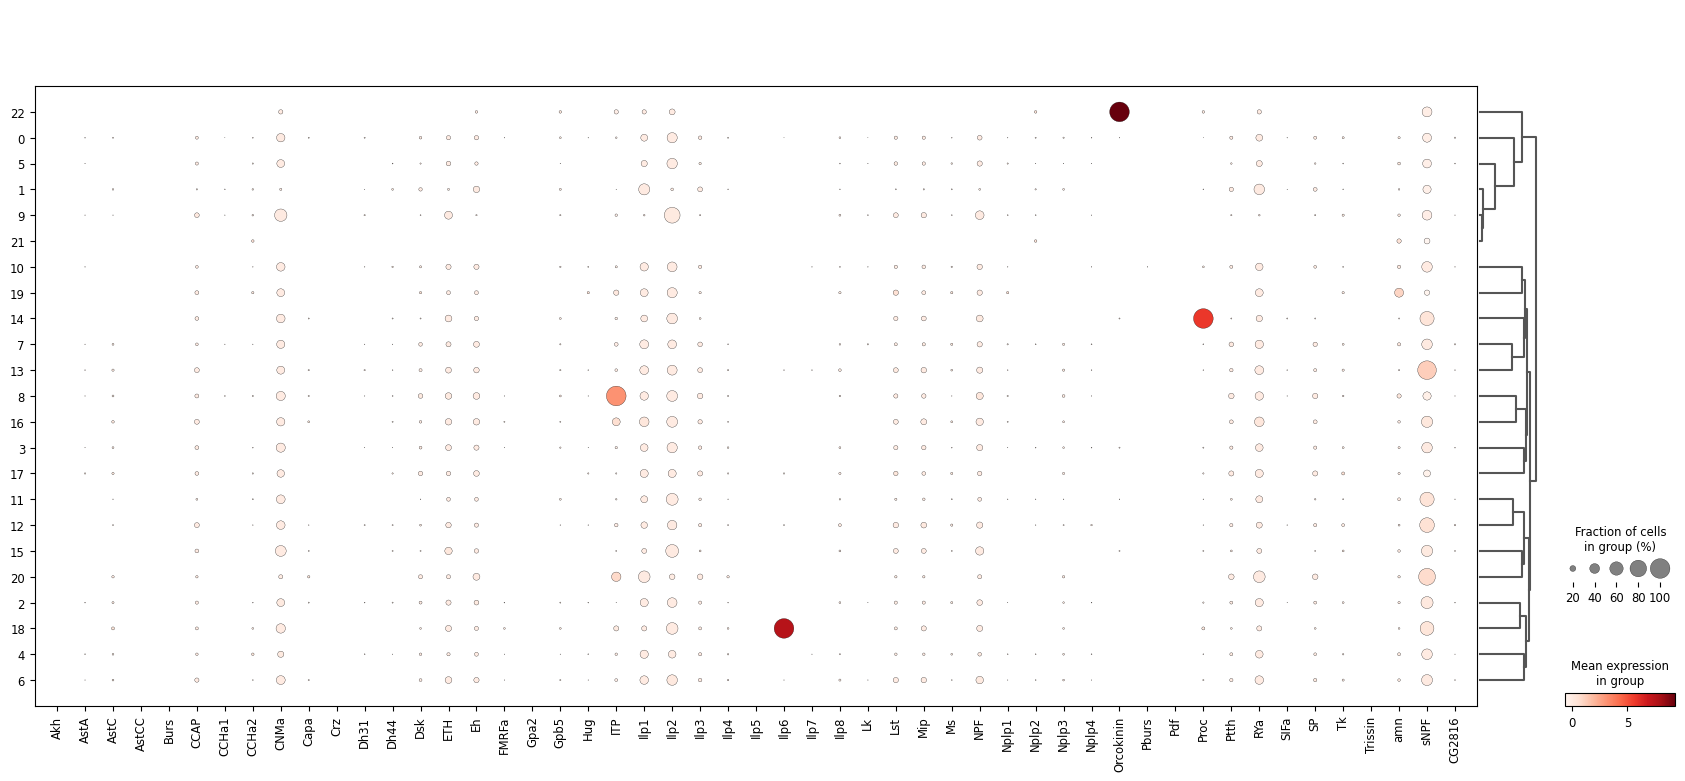

In [90]:
scanpy.pl.dotplot(amtx, neuropeptides[:-1]+spab, groupby='clusters', dendrogram=True)

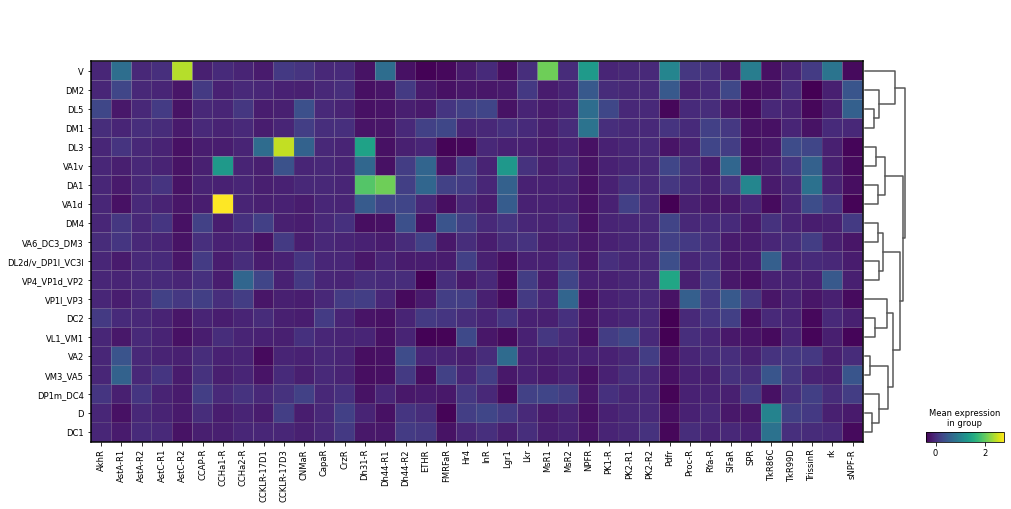

In [70]:
scanpy.pl.matrixplot(amtx_f, neuropeptide_receptors, groupby='annotated', dendrogram=True)

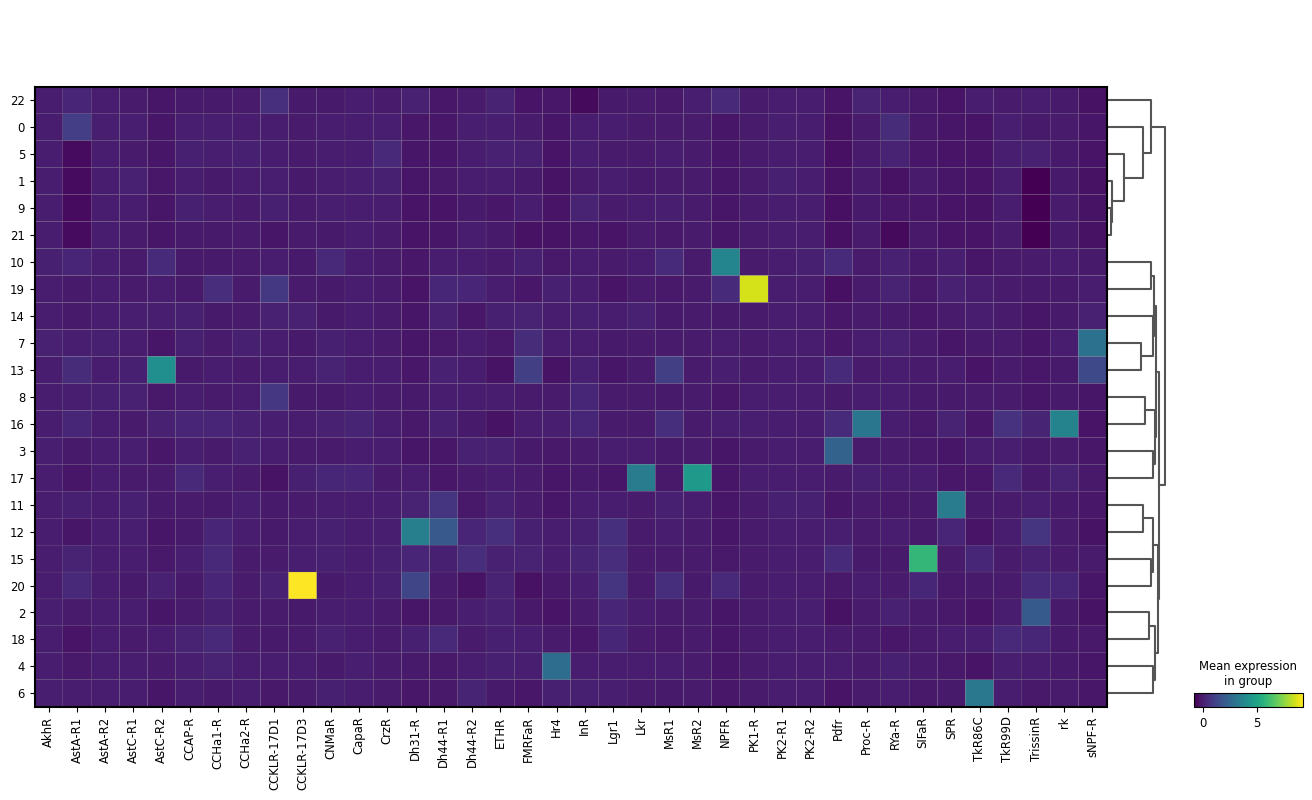

In [91]:
scanpy.pl.matrixplot(amtx, neuropeptide_receptors, groupby='clusters', dendrogram=True)

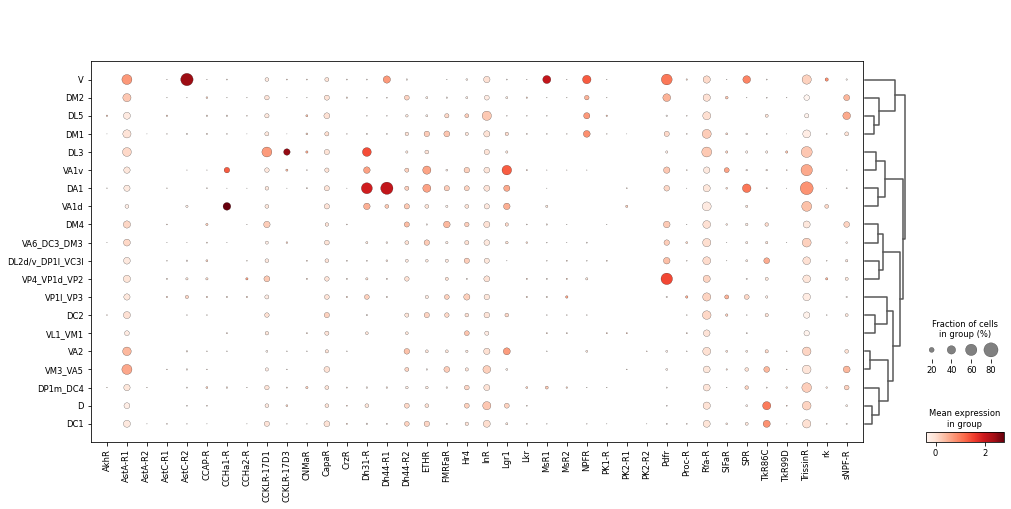

In [71]:
scanpy.pl.dotplot(amtx_f, neuropeptide_receptors, groupby='annotated', dendrogram=True)

/Users/yazatian/Desktop/rnaseq/sca/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


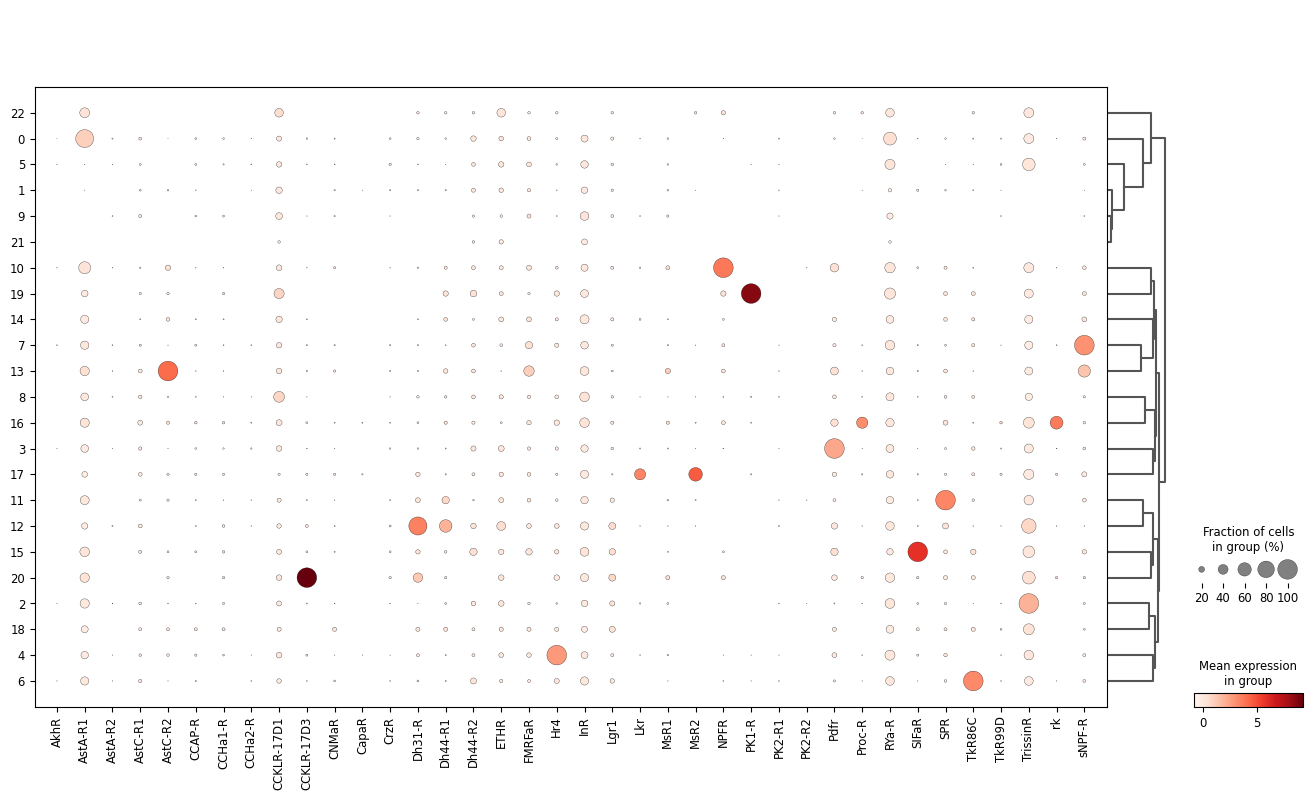

In [92]:
scanpy.pl.dotplot(amtx, neuropeptide_receptors, groupby='clusters', dendrogram=True)

/Users/yazatian/Desktop/rnaseq/sca/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/Users/yazatian/Desktop/rnaseq/sca/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/Users/yazatian/Desktop/rnaseq/sca/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/Users/yazatian/Desktop/rnaseq/sca/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/Users/yazatian/Desktop/rnaseq/sca/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_

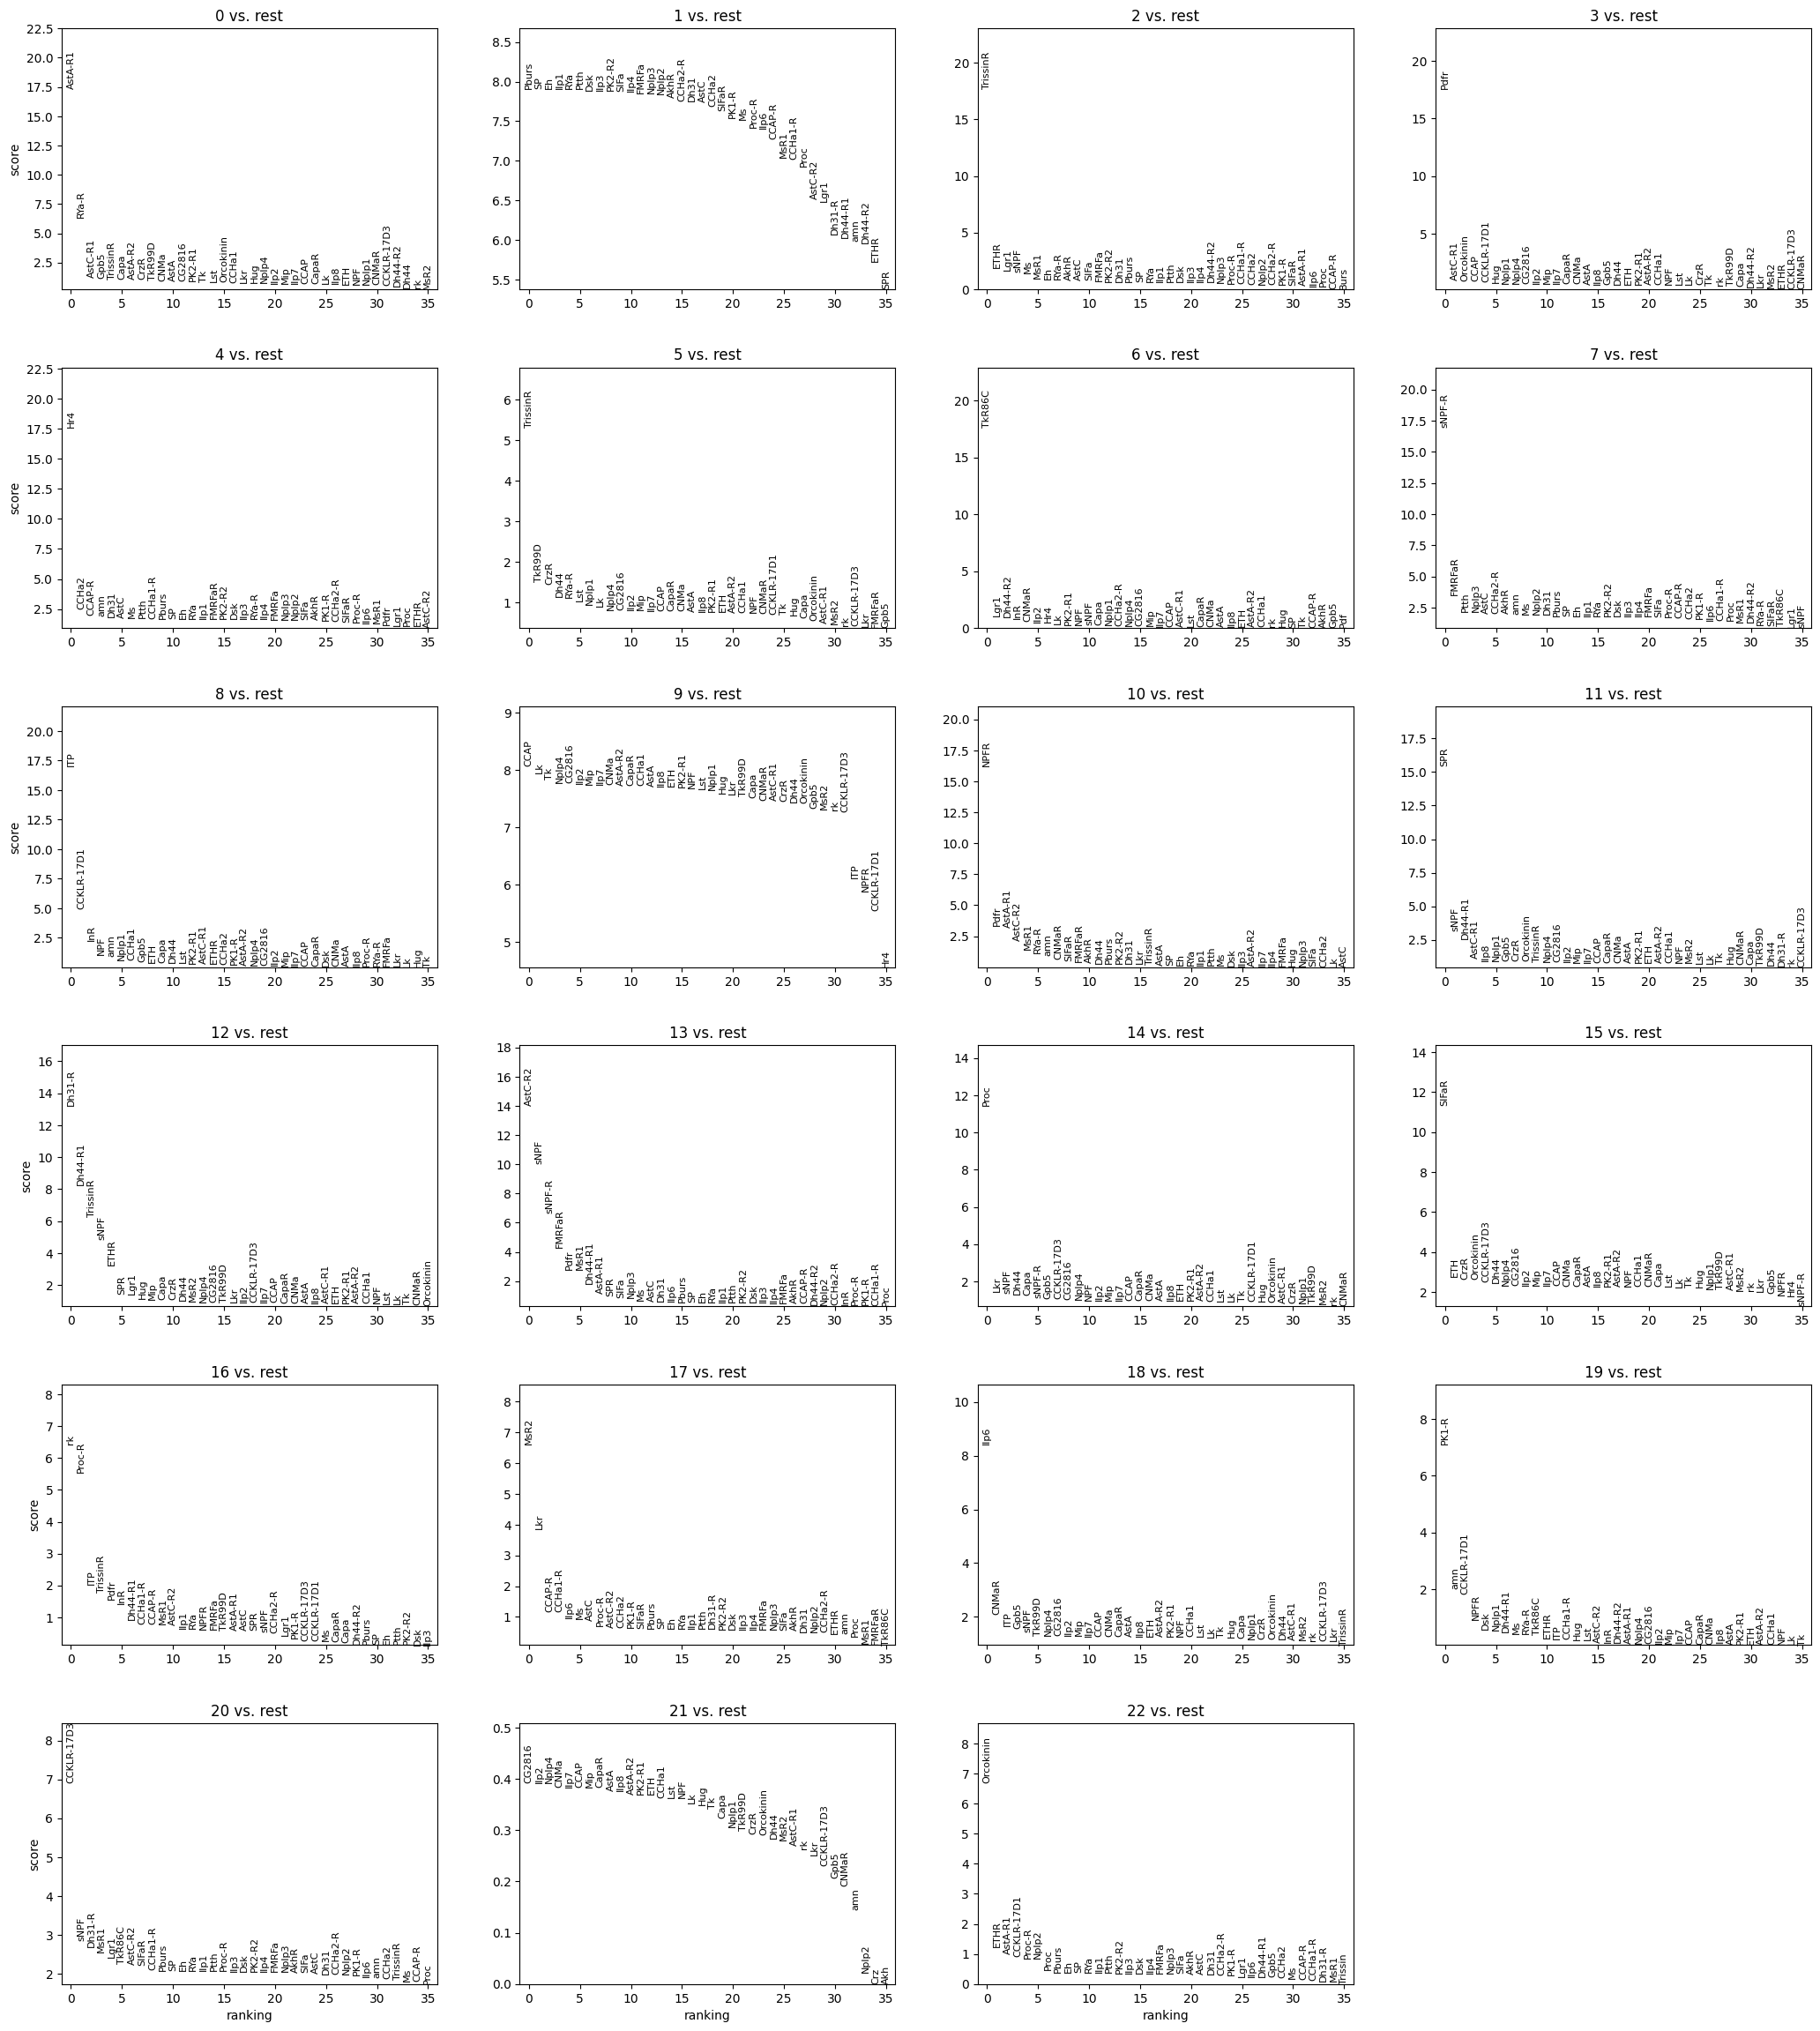

In [93]:
scanpy.tl.rank_genes_groups(amtx, 'clusters', method='wilcoxon')
scanpy.pl.rank_genes_groups(amtx, n_genes=36, sharey=False)

/home/yma781/py38/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/yma781/py38/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/yma781/py38/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/yma781/py38/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/yma781/py38/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/yma781/py38/lib/python3.8/site-packages/scan

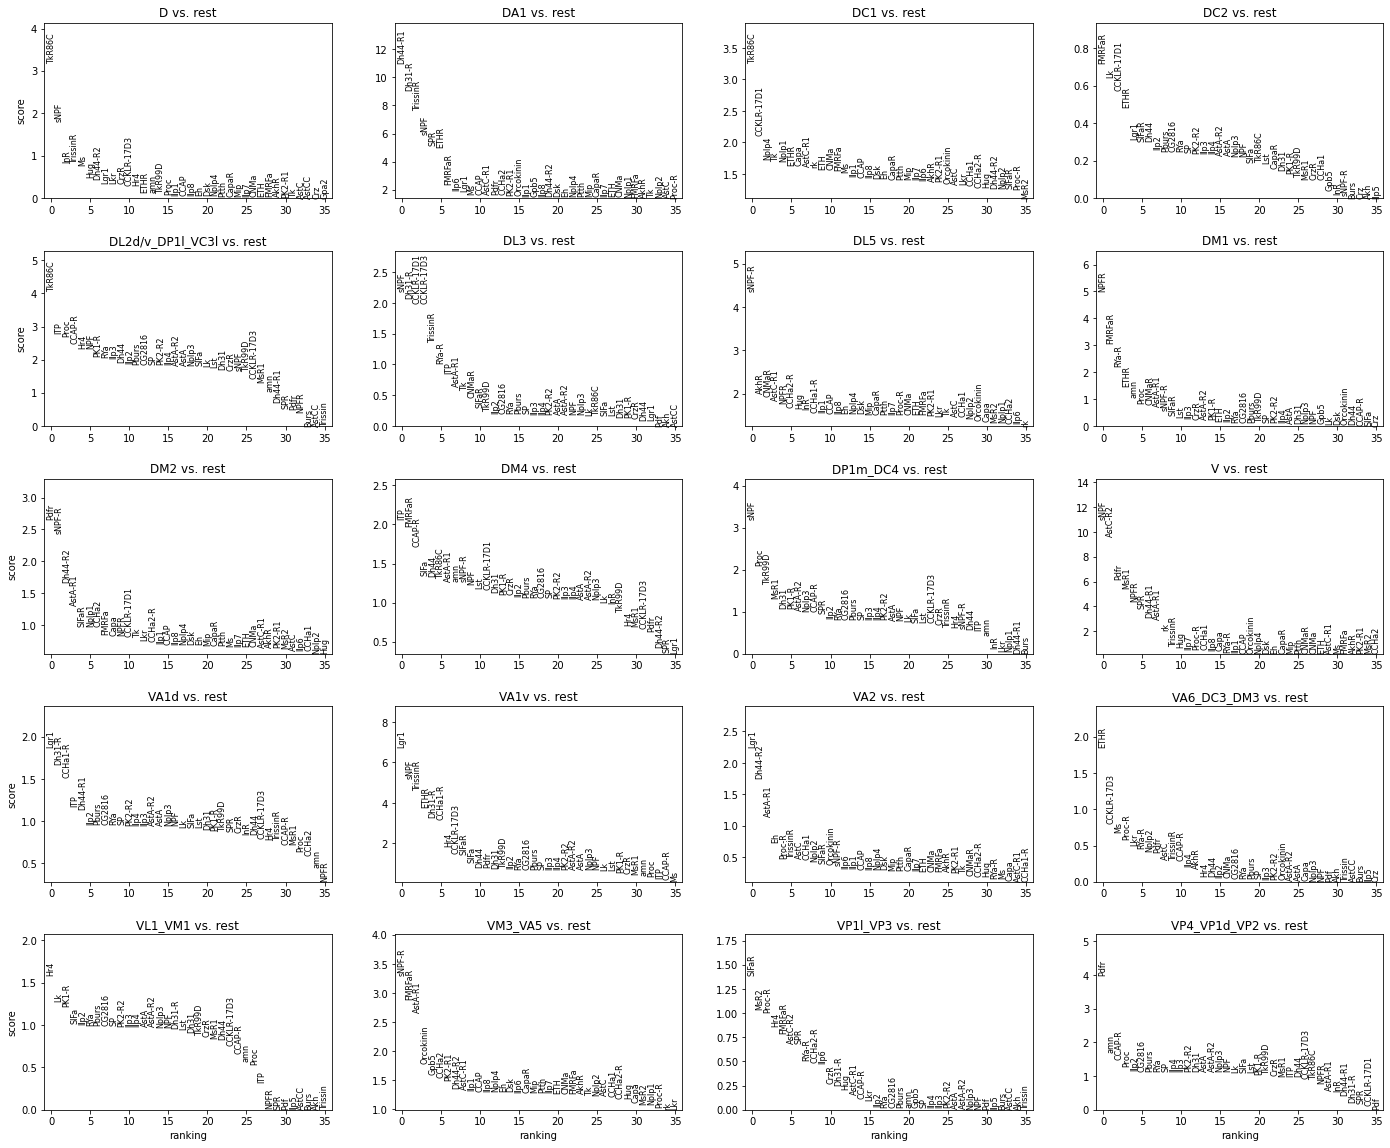

In [72]:
scanpy.tl.rank_genes_groups(amtx_f, 'annotated', method='wilcoxon')
scanpy.pl.rank_genes_groups(amtx_f, n_genes=36, sharey=False)

In [73]:
amtx_f

AnnData object with n_obs × n_vars = 1366 × 89
    obs: 'n_genes_by_counts', 'total_counts', 'clusters', 'annotated'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'clusters_colors', 'dendrogram_clusters', 'dendrogram_annotated', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [74]:
amtx

AnnData object with n_obs × n_vars = 1819 × 89
    obs: 'n_genes_by_counts', 'total_counts', 'clusters', 'annotated'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'clusters_colors', 'dendrogram_clusters'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [94]:
gene_names[gene_names.str.contains('Ir75')]

7637     Ir75a
7697     Ir75d
13694    Ir75c
13695    Ir75b
dtype: object

In [95]:
len(neuropeptides)

51

In [96]:
len(neuropeptide_receptors)

38